# **Elaniin | #1 GreatPlaceToWork | El Salvador 2024**
## Attrition Prediction Project by Fabrizio Sgro

<img src="portada.jpg" alt="Portada Image" width="1280" height="720">


# Análisis Exploratorio de Datos - IBM HR Attrition Prediction Dataset 

## Introducción

Este conjunto de datos contiene información anónima de colaboradores de una organización. El objetivo es predecir si un colaborador renunciará o no (variable Attrition). A continuación, se detallan las variables categóricas, ordinales y continuas presentes en el dataset.

## Variables del Dataset

### Categóricas:

- **`Attrition`**: Variable dicotómica. Indica 'Yes' (Si el colaborador renunció) o 'No' (si no renunció). Esta es la variable objetivo que deseamos **predecir**.

- `BusinessTravel`: Variable categórica. Especifica la frecuencia de viajes del colaborador (Travel_Rarely, Travel_Frequentl, Non-Travel).

- `Department`: Departamento en el que trabaja el colaborador (Research & Development, Sales, Human Resources).

- `Education`: Tipo de educación del colaborador. Variable categórica etiquetada: 1,2,3,4,5.
    + 1 'Below College'
    + 2 'College'
    + 3 'Bachelor'
    + 4 'Master'
    + 5 'Doctor'

- `EducationField`: Campo de educación. (Life Sciences, Medical, Marketing, Technical Degree, Other, Human Resources).

- `EnvironmentSatisfaction`: Variable ordinal (1,2,3,4) sobre la satisfacción con el ambiente laboral. Me interesa ver cuáles son los rangos de edad, departamento, funciones que menor satisfacción poseen y como afecta esto a su **posibilidad de renunciar**.
    + 1 'Low'
    + 2 'Medium'
    + 3 'High'
    + 4 'Very High'

- `Gender`: Género del colaborador, solo indican dos géneros de todos los que hay (Male, Female)

- `JobInvolvement`: Involucramiento del colaborador en los trabajos. Asigna 4 tipos de niveles, 1,2,3 y 4.
    + 1 'Low'
    + 2 'Medium'
    + 3 'High'
    + 4 'Very High' 

- `JobLevel`: Variable categórica, indica el nivel del colaborador, siendo 1 el más común y 5 el menos común:(1,2,3,4,5) 

- `JobRole`: Variable categórica, especifica el rol del colaborador:
    + Sales Executive	
    + Research Scientist
    + Laboratory Technician	
    + Manufacturing Director	
    + Healthcare Representative	
    + Manager	
    + Sales Representative	
    + Research Director
    + Human Resources

- `JobSatisfaction`: Nivel de satisfacción con el trabajo de cada colaborador.Va del 1-4.
    + 1 'Low'
    + 2 'Medium'
    + 3 'High'
    + 4 'Very High'

- `MaritalStatus`: Estado civil del colaborador. (Casado, Soltero o Divorciado)

- `OverTime`: Indica si el colaborador hace horas extras o no.

- `PerformanceRating`: Nivel de performance del colaborador: 
    + 1 'Low'
    + 2 'Good'
    + 3 'Excellent'
    + 4 'Outstanding'`

- `RelationShipSatisfaction`: 
    + 1 'Low'
    + 2 'Medium'
    + 3 'High'
    + 4 'Very High'

- `WorkLifeBalance`
    + 1 'Bad'
    + 2 'Good'
    + 3 'Better'
    + 4 'Best'

- `StockOptionLevel`: Variable categórica etiquetada con 0 (sin acciones), 1, 2 y 3 para indicar el nivel de Acciones que el colaborador recibe como compensación en caso de recibirlo. 


### Númericas:

- `Age`: Edad de los colaboradores.

- `DailyRate`: Compensación que gana el colaborador por día.

- `DistanceFromHome`: Distancia hasta el trabajo desde la casa del colaborador (Rango de 1-29, la unidad de medida no es específica).

- `EmployeeNumber`: ID Asignado al Colaborador, rango 1-1470. No creo que tenga relevancia ya que no tenemos forma de saber si el ID 1 = Al primer colaborador o al último.

- `HourlyRate`: Compensación por hora del colaborador.

- `MonthlyIncome`: Salario mensual del colaborador.

- `MonthlyRate`: Compensación mensual del colaborador.

- `NumCompaniesWorked`: Número de compañías previas en las que ha trabajdo el colaborador.

- `StandardHours`: Horas estándar. Variable númerica. Todos los colaboradores tienen 80.

- `TotalWorkingYears`: Cantidad de años total trabajando.

- `TrainingTimesLastYear`: Cantidad de veces que el colaborador recibió entrenamientos durante el año pasado.

- `YearsAtCompany`: Cantidad total de años trabajando en la organización.

- `YearsInCurrentRole`: Cantidad de años en el rol actual del colaborador.

- `YearsSinceLastPromotion`: Años dessde la última promoción.

- `YearsWithCurrManager`: Años con el actual manager.

## Contexto y Enunciación del Problema.

El análisis de HR Analytics nos ayuda a interpretar los datos organizacionales y descubrir tendencias relacionadas con las personas en la organización. En miras de lograr el objetivo de #1 Best Place To Work de El Salvador, deberemos incluir tecnología para ser capaces de detectar con mayor velocidad la posibilidad de attrition y desatisfacción de los colaboradores.

### Hipótesis 
Se cree que existen diferentes variables y condiciones que pueden favorecer a los colaboradores a renunciar e irse de las empresas. Este proyecto busca rechazar la hipótesis nula que declara que no hay posibilidad de decir con presición cuando una persona es factible a renunciar.

Para ello deberemos responder preguntas como:
+ ¿Existe alguna relación entre la posibilidad de renuncia y la cantidad de años con el mismo manager? 

+ ¿O tal vez, la cantidad de años en una misma posición? ¿Qué hay de los años sin una promoción?

+ ¿Hay departamentos con mayor rotación de personal que deban recibir mayor atención por parte del departamento de HR? 

+ ¿Qué tanto impacta la satisfacción con el ambiente en la posibilidad de renuncia? 

En este análisis, utilizaremos técnicas de exploración de datos para encontrar patrones o criterios que estén más relacionados con la atrición de colaboradores. El objetivo es identificar factores que puedan predecir posibles casos de atrición y ayudar al equipo de recursos humanos a tomar medidas adecuadas para retener a los empleados.


In [489]:
#Tratamiento de datos y lectura de datos
import mysql.connector
import pandas as pd
import numpy as np
from datetime import datetime
import requests
import json 

#Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.ticker import FuncFormatter
from plotly import graph_objects as go


#Matemáticas y estadísticas
import statsmodels.stats.proportion as prop
import math
from scipy.stats import pointbiserialr


#Modelos de aprendizaje automático
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


#Estandarización y pre procesamiento
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

#Selección de variables para modelos de aprendizaje automático
from sklearn.decomposition import PCA

#Visualización de variables para modelos de aprendizaje automático
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

#Pipelines
from sklearn.pipeline import make_pipeline


#Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import recall_score

#Warnings
import warnings
warnings.filterwarnings("ignore")

#environment variables
from dotenv import load_dotenv
import os



In [490]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [492]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


***Observaciones:***

- El promedio de edad de los colaboradores es de los 37 años. Hay un rango de edad de 18 a 60 años de edad.

- Al menos el 50% de los empleados viven en un radio de 7 millas de la organización de los HeadQuarters. El más lejano está a 29 millas.

- El promedio de salario de los empleados de la organización es $6502 USD. Al menos el 50% de los colaboradores de la organización reciben $4919 USD como remuneración mensual. Hay una diferencia enorme entre las personas que más ganan en la organización y las que menos ganan. $1000 - $20000. El salto se da en desde el 3° cuartil ($8379 USD) a $20000 USD. Es un salto desproporcional, pero entendible. 

- El aumento promedio que reciben los colaboradores de es del 15%. El 50% de los colaboradores ha experimentado, al menos un 14% de aumento salarial. 

- En cuanto a los años desde el último ascenso o promoción, el promedio es de 2 años. Mientras que al menos el 50% de la organización ha recibido una promoción hace no más de 1 año. 

- El promedio de años que los colaboradores se han mantenido trabajando para la organización es de 7 años. 

- En cuanto a la performance de colaboradores, diría que no hemos tenido casos de bajas o pobres performances. Todos han performardo "excelente". 

### Limpieza, manipulación y tratamiento de valores vacíos | Data Wrangling 

No hay valores vacíos! De haber tenidos valores vacíos tendríamos que haber aplicado técnicas de tratamientos de valores vacíos

In [493]:
df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0})

In [494]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_categorical = df[categorical_columns]
df_numeric = df[numeric_columns]

In [495]:
df_numeric.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,1,40,3,...,4,80,1,6,3,3,2,2,2,2


In [496]:
df_categorical

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [497]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorias_mapeo = {}

for columna in df_categorical.columns:
    df_categorical[columna] = le.fit_transform(df_categorical[columna])
    categorias_mapeo[columna] = dict(zip(le.classes_, le.transform(le.classes_)))

df_categorical.head()



,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,2,2,1,0,7,2,0,1
1,1,1,1,1,6,1,0,0
2,2,1,4,1,2,2,0,1
3,1,1,1,0,6,1,0,1
4,2,1,3,1,2,1,0,0


In [498]:
df_encoded = pd.concat([df_categorical, df_numeric], axis=1)

# Mover la columna 'Attrition' al principio
columna_attrition = df_encoded['Attrition']
df_encoded.drop(columns=['Attrition'], inplace=True)
df_encoded.insert(0, 'Attrition', columna_attrition)
df_encoded.head(3)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Age,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,2,2,1,0,7,2,0,1,41,...,1,80,0,8,0,1,6,4,0,5
1,0,1,1,1,1,6,1,0,0,49,...,4,80,1,10,3,3,10,7,1,7
2,1,2,1,4,1,2,2,0,1,37,...,2,80,0,7,3,3,0,0,0,0


In [499]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [500]:
columnas_a_eliminar= ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df_encoded = df_encoded.drop(columnas_a_eliminar, axis=1)
df_encoded

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Age,DailyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,2,2,1,0,7,2,1,41,1102,...,3,1,0,8,0,1,6,4,0,5
1,0,1,1,1,1,6,1,0,49,279,...,4,4,1,10,3,3,10,7,1,7
2,1,2,1,4,1,2,2,1,37,1373,...,3,2,0,7,3,3,0,0,0,0
3,0,1,1,1,0,6,1,1,33,1392,...,3,3,0,8,3,3,8,7,3,0
4,0,2,1,3,1,2,1,0,27,591,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,1,3,1,2,1,0,36,884,...,3,3,1,17,3,3,5,2,0,3
1466,0,2,1,3,1,0,1,0,39,613,...,3,1,1,9,5,3,7,7,1,7
1467,0,2,1,1,1,4,1,1,27,155,...,4,2,1,6,0,3,6,2,0,3
1468,0,1,2,3,1,7,1,0,49,1023,...,3,4,0,17,3,2,9,6,0,8


In [501]:
total= df_encoded.Attrition.value_counts().sum()
negativos = df_encoded.Attrition.value_counts()[0]
positivos = df_encoded.Attrition.value_counts()[1]

print('Del total de casos ({}), el {:.2%} corresponde a personas que no renunciaron y el {:.2%} a personas que sí. Podemos ver un interesante desbalance de la clase a predecir.'.format((total),(negativos/total),(positivos/total)))

Del total de casos (1470), el 83.88% corresponde a personas que no renunciaron y el 16.12% a personas que sí. Podemos ver un interesante desbalance de la clase a predecir.


In [502]:
#profile = ProfileReport(df_encoded, title='Pandas Profiling Report', explorative=True)
#profile.to_file("visualización.html")

In [503]:
df_corr1 = df_encoded.corr(method='spearman')

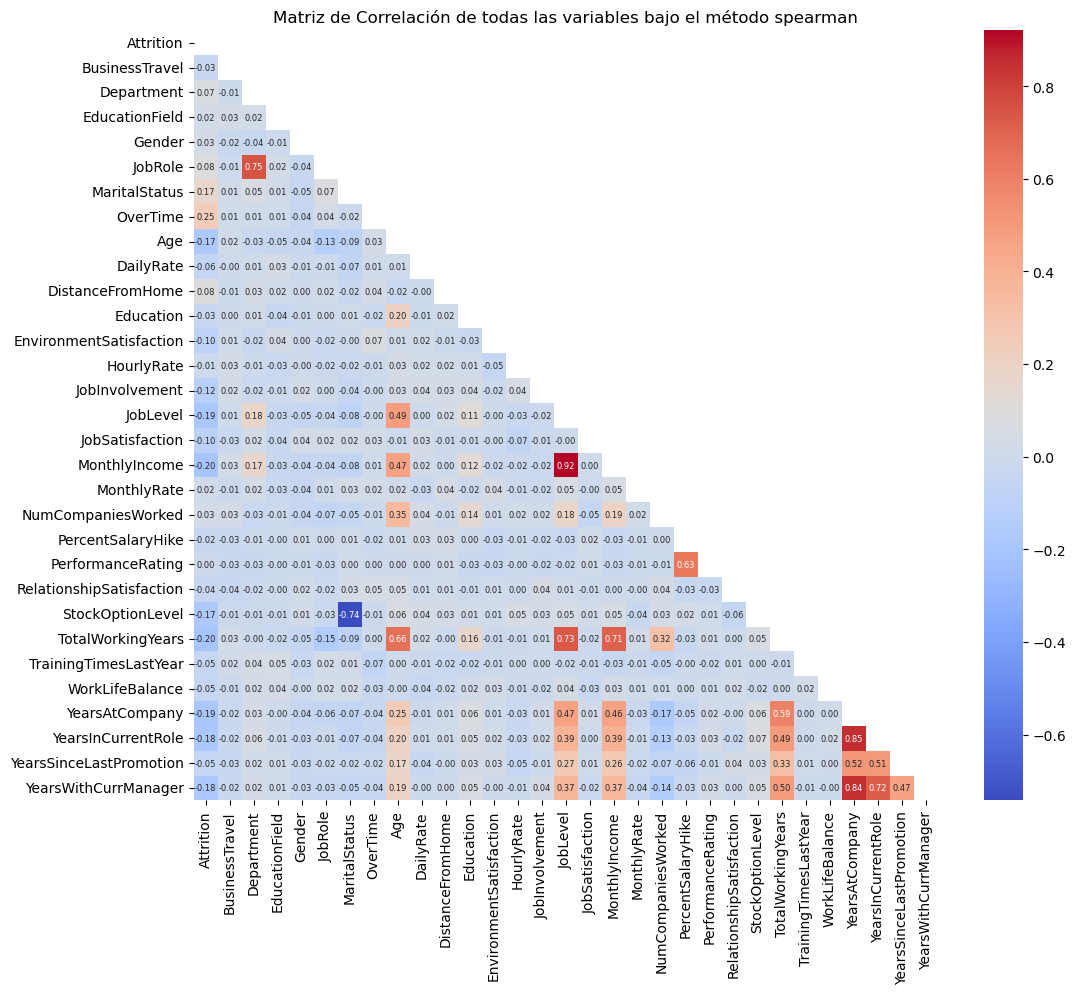

In [504]:
mask = np.triu(np.ones_like(df_corr1, dtype=bool))

# Visualizamos
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr1, annot=True, cmap='coolwarm', fmt='.2f', mask=mask, annot_kws={"size": 6})
plt.title('Matriz de Correlación de todas las variables bajo el método spearman')
plt.show()


***Comentarios***:

+ Para la variable a predecir, no se presentan correlaciones fuertes con ninguna variables, solo pequeñas correlaciones (negativas mayormente) y una correlación interesante con OverTime.



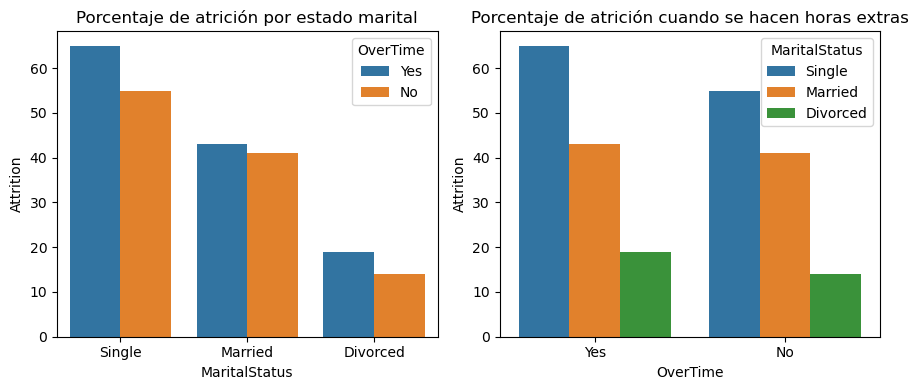

In [505]:
marital_agrupado= df.groupby(['MaritalStatus', 'OverTime']).sum().sort_values('Attrition', ascending=False).reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))


sns.barplot(data=marital_agrupado, x='MaritalStatus', y='Attrition', hue='OverTime',ax=ax1)
ax1.set_title('Porcentaje de atrición por estado marital')

sns.barplot(data=marital_agrupado, x='OverTime', y='Attrition', hue= 'MaritalStatus', ax=ax2)
ax2.set_title('Porcentaje de atrición cuando se hacen horas extras')

plt.tight_layout()

plt.show()


***Comentarios:***
+ En cuanto al porcentaje de renuncias por estado civil vemos una gran diferencia entre las personas solteras y las casadas y divorciadas. Estamos hablando de que 237 renuncias, 120 la hicieron personas solteras, es decir el 50,6%. Las personas casadas con un 35,44% y las divorciadas 13,92%. 

+ El 53,58% de las personas que renunciaron hacían horas extras. El 46,41% no. Por lo que debemos seguir investigando que otras razones los llevan a renunciar.

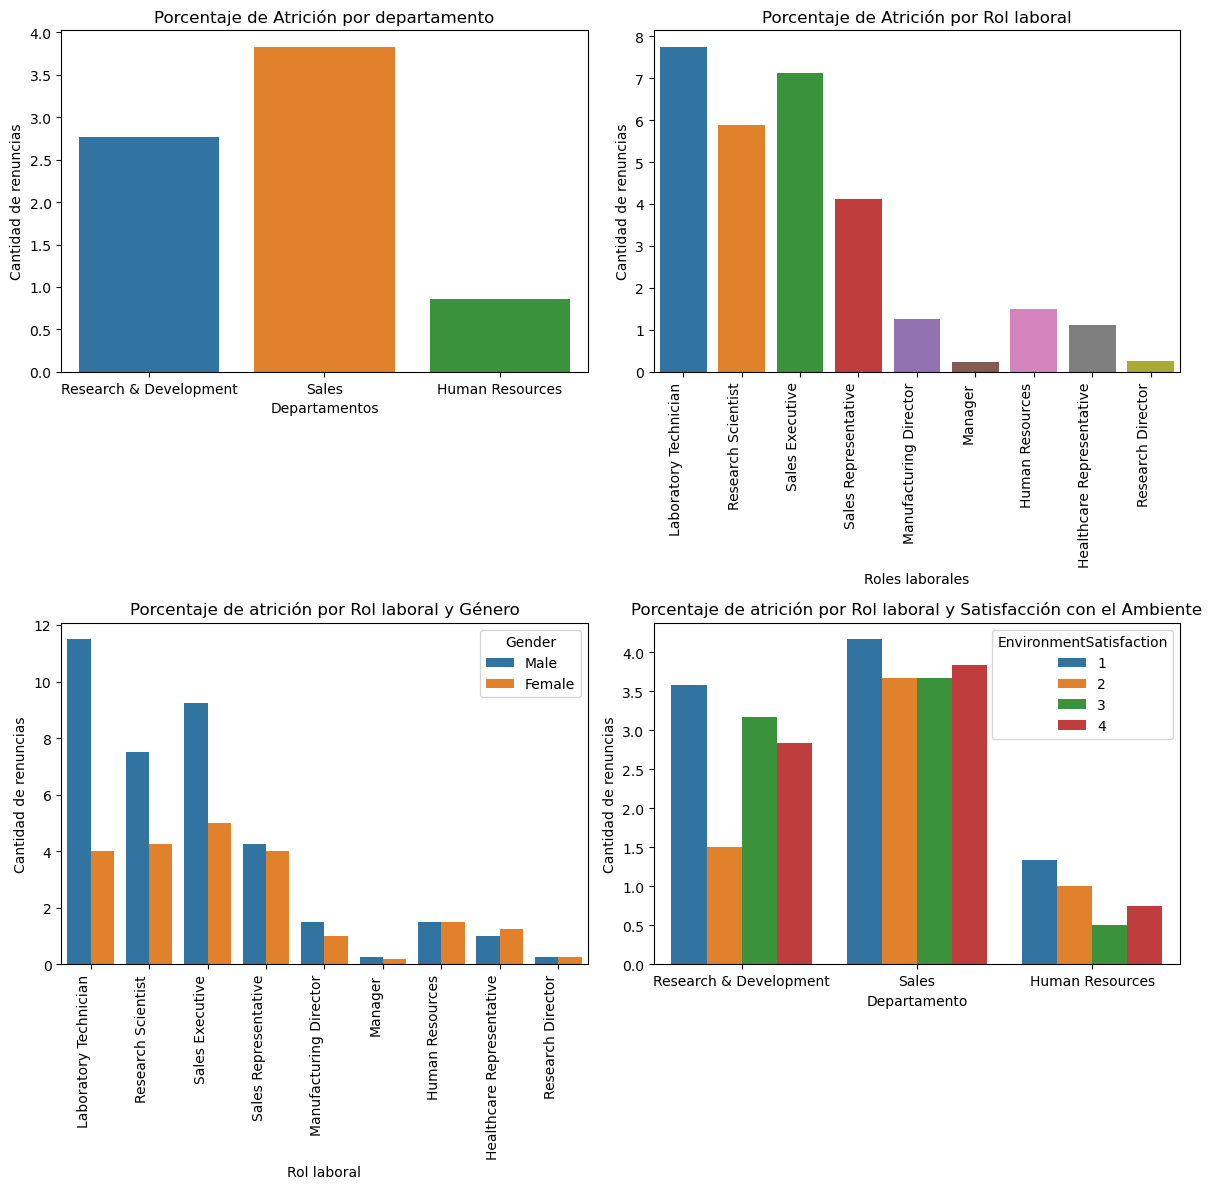

In [506]:
dpto_agrupado = df.groupby(['Department', 'JobRole', 'Gender', 'EnvironmentSatisfaction']).sum().sort_values('Attrition', ascending=False).reset_index()

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Bar plot 1 - Department vs Attrition
sns.barplot(data=dpto_agrupado, x='Department', y='Attrition', ci=None, ax=axes[0, 0])
axes[0, 0].set_title('Porcentaje de Atrición por departamento')
axes[0, 0].set_xlabel('Departamentos')
axes[0, 0].set_ylabel('Cantidad de renuncias')

# Bar plot 2 - JobRole vs Attrition
sns.barplot(data=dpto_agrupado, x='JobRole', y='Attrition', ci=None, ax=axes[0, 1])
axes[0, 1].set_title('Porcentaje de Atrición por Rol laboral')
axes[0, 1].set_xlabel('Roles laborales')
axes[0, 1].set_ylabel('Cantidad de renuncias')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90, ha='right')

# Bar plot 3 - JobRole vs Attrition (with Gender as hue)
sns.barplot(data=dpto_agrupado, x='JobRole', y='Attrition', hue='Gender', ci=None, ax=axes[1, 0])
axes[1, 0].set_title('Porcentaje de atrición por Rol laboral y Género')
axes[1, 0].set_xlabel('Rol laboral')
axes[1, 0].set_ylabel('Cantidad de renuncias')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90, ha='right')

# Bar plot 4 - JobRole vs Attrition (with EnvironmentSatisfaction as hue)
sns.barplot(data=dpto_agrupado, x='Department', y='Attrition', hue='EnvironmentSatisfaction', ci=None, ax=axes[1, 1])
axes[1, 1].set_title('Porcentaje de atrición por Rol laboral y Satisfacción con el Ambiente')
axes[1, 1].set_xlabel('Departamento')
axes[1, 1].set_ylabel('Cantidad de renuncias')

plt.tight_layout()
plt.show()


***Comentarios:***

+ El departamento con más renuncias es `Research & Development`, tiene el 56% de todas las renuncias, seguido por ventas con el 38%.

+ El Rol laboral con más renuncias es el de `Laboratory Technician`, 26% del total de roles laborales. Le el sigue el puesto `Sales Executive` con 57 reununcias (24% del total) y `Research Scientist` con el 20% del total. Estos 3 puestos de trabajo constituyen el 70% de las renuncias.

+ Ahora nacen más preguntas, ¿serán los managers de estos departamentos los motivos de las renuncias? ¿Será la distancia? ¿La compensación?

+ En cuanto a la distribución por satisfacción con el ambiente laboral: 
    + Podemos ver que el 30% corresponde a baja satisfacción (1). 
    + Seguido por 'algo satisfecho' (3) con el 26%. 
    + El grado 'muy satisfecho' (4) contempla el 25% de las renuncias. 
    + Y por último, 'algo insatisfecho' (2) el restante 19%. 

Esto solo me hace pensar que la satisfacción del ambiente laboral no es una variable de mucha significancia para predecir la decisión de un colaborador al renunciar o no. 

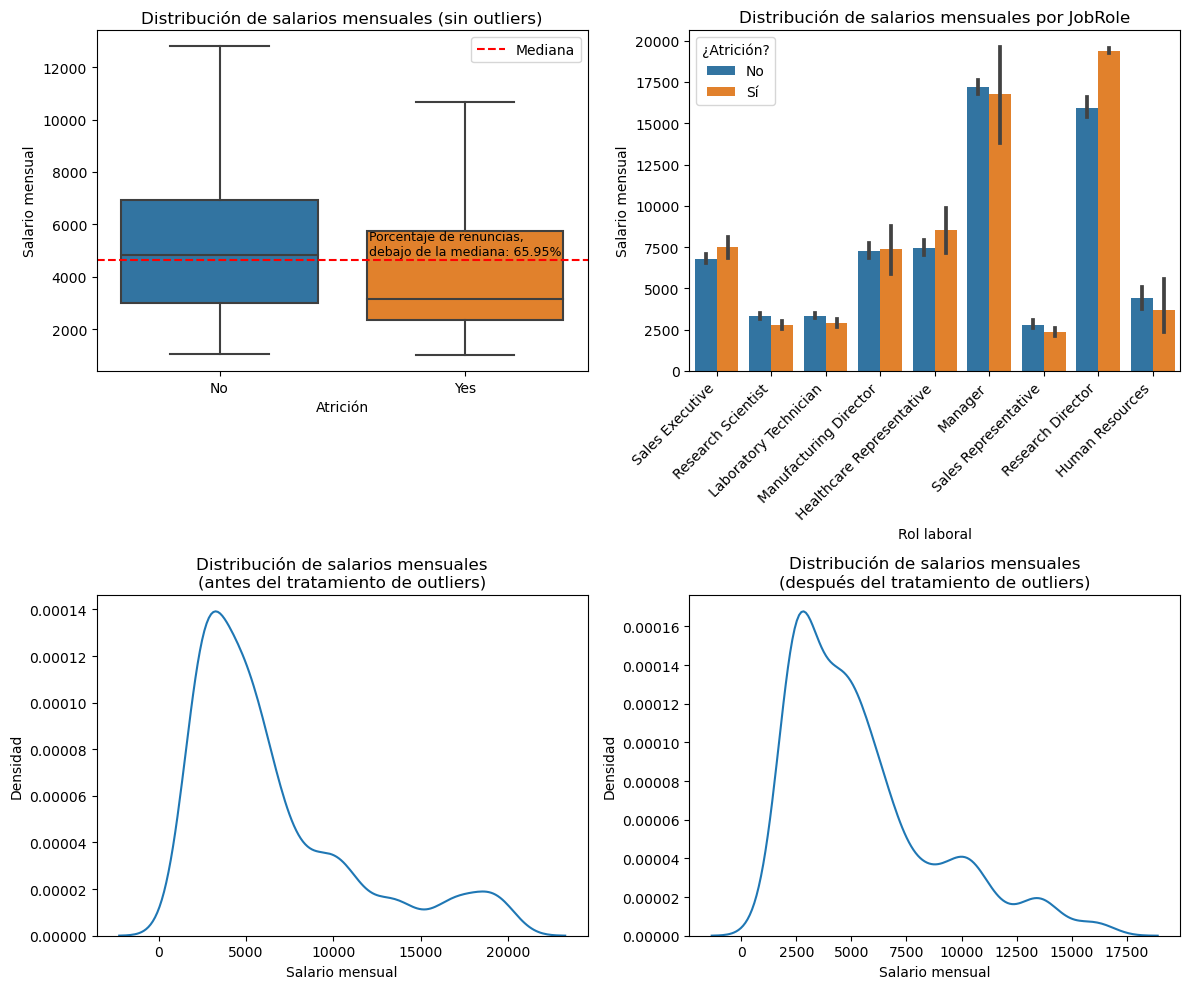

In [507]:
# Tratamiento de outliers por que la distribución está muy despareja
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers del DataFrame
df_filtered = df[(df['MonthlyIncome'] >= lower_bound) & (df['MonthlyIncome'] <= upper_bound)]

# Calcular la mediana sin outliers
median_no_outliers = df_filtered['MonthlyIncome'].median()

# Create a figure and axes for the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1 - Box plot of MonthlyIncome without outliers
ax1 = sns.boxplot(data=df_filtered, x='Attrition', y='MonthlyIncome', showfliers=False, ax=axes[0, 0])
ax1.set_title('Distribución de salarios mensuales (sin outliers)')
ax1.set_ylabel('Salario mensual')
ax1.set_xlabel('Atrición')
ax1.set_xticklabels(['No', 'Yes'])
# Add a horizontal line to indicate the median without outliers
ax1.axhline(median_no_outliers, color='red', linestyle='dashed', linewidth=1.5, label='Mediana')
# Display the percentage below the median as text in the plot
percentage_below_median = (df_filtered[df_filtered['Attrition'] == 1]['MonthlyIncome'] < median_no_outliers).mean() * 100
ax1.text(0.61, median_no_outliers + 190, f'Porcentaje de renuncias,\ndebajo de la mediana: {percentage_below_median:.2f}%', ha='left', color='black', fontsize=9)
ax1.legend()

# Plot 2 - Bar plot of MonthlyIncome by JobRole and Attrition
ax2 = sns.barplot(data=df, x='JobRole', y='MonthlyIncome', hue='Attrition', ax=axes[0, 1])
ax2.set_title('Distribución de salarios mensuales por JobRole')
ax2.set_xlabel('Rol laboral')
ax2.set_ylabel('Salario mensual')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
handles, labels = ax2.get_legend_handles_labels()
new_labels = ['No', 'Sí']
ax2.legend(handles, new_labels, title='¿Atrición?')

# Plot 3 - KDE plot of MonthlyIncome before outlier treatment
ax3 = sns.kdeplot(data=df, x='MonthlyIncome', ax=axes[1, 0])
ax3.set_title('Distribución de salarios mensuales\n(antes del tratamiento de outliers)')
ax3.set_xlabel('Salario mensual')
ax3.set_ylabel('Densidad')

# Plot 4 - KDE plot of MonthlyIncome after outlier treatment
ax4 = sns.kdeplot(data=df_filtered, x='MonthlyIncome', ax=axes[1, 1])
ax4.set_title('Distribución de salarios mensuales\n(después del tratamiento de outliers)')
ax4.set_xlabel('Salario mensual')
ax4.set_ylabel('Densidad')

plt.tight_layout()
plt.show()

***Comentarios:***:

+ Parece ser que el MonthlyIncome si puede llegar a ser una variable interesante ya que a pesar de que la distribución del salario está acostada a la izquierda (los valores atípicos son las pocas personas ganando mucha cantidad de dinero, esto está asociado a la brecha salarial que hay entre los puestos directivos y operativos), vemos que el apróximadamente el 66% de las personas que renunciaron estaban reicibiendo menos de la mediana de salario mensual que el resto. 

+ Esto lo que quiere decir no es que por cobrar menos alguien va a renunciar, pero sí se ve claramente que la gente que renuncia gana menos en proporción. 


In [508]:
df2 = df.copy()

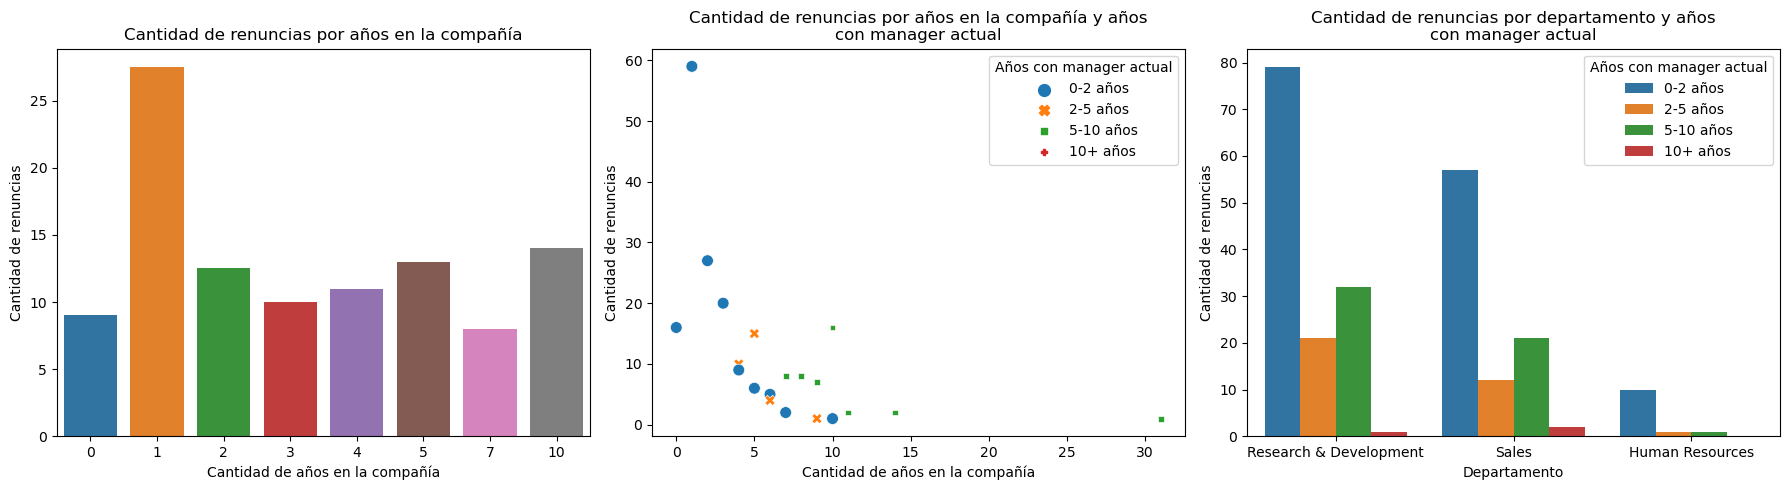

In [509]:
yrs_grouped = df2.groupby(['YearsAtCompany', 'Department']).sum().reset_index().sort_values('Attrition', ascending=False)[:10]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=yrs_grouped, x='YearsAtCompany', y='Attrition', ax=ax1, ci=False)
ax1.set_title('Cantidad de renuncias por años en la compañía')
ax1.set_ylabel('Cantidad de renuncias')
ax1.set_xlabel('Cantidad de años en la compañía')

bins = [-1, 2, 5, 10, float('inf')]
labels = ['0-2 años', '2-5 años', '5-10 años', '10+ años']

df2['YearsWithCurrManager_Grouped'] = pd.cut(df2['YearsWithCurrManager'], bins=bins, labels=labels)

yrs_grouped = df2.groupby(['YearsAtCompany', 'YearsWithCurrManager_Grouped']).sum().reset_index().sort_values('Attrition', ascending=False)[:20]

sns.scatterplot(data=yrs_grouped, x='YearsAtCompany', y='Attrition', hue='YearsWithCurrManager_Grouped',style='YearsWithCurrManager_Grouped',  size='YearsWithCurrManager_Grouped', ax=ax2)
ax2.set_title('Cantidad de renuncias por años en la compañía y años\ncon manager actual')
ax2.set_ylabel('Cantidad de renuncias')
ax2.set_xlabel('Cantidad de años en la compañía')
ax2.legend(title='Años con manager actual')

managers_agrupados = df2.groupby(['Department', 'YearsWithCurrManager_Grouped']).sum().reset_index().sort_values('Attrition', ascending=False)

sns.barplot(data=managers_agrupados, x='Department', y='Attrition', hue='YearsWithCurrManager_Grouped', ax=ax3)
ax3.set_title('Cantidad de renuncias por departamento y años\ncon manager actual')
ax3.set_ylabel('Cantidad de renuncias')
ax3.set_xlabel('Departamento')
ax3.legend(title='Años con manager actual')

plt.tight_layout()

plt.show()


***Comentarios:***:

+ Parece que existe un gran riesgo de perder colaboradores entre sus primeros 2 años. Sobre todo para los departamentos de Ventas y Research & Development. Digamos que vemos la tendencia de que a mayor cantidad de años en la compañía menor la probabilidad de renunciar (aunque parezca obvio).

+ Esto lo que quiere decir no es que por cobrar menos alguien va a renunciar, pero sí se ve claramente que la gente que renuncia gana menos en proporción. 

+ Por otro lado, parece no haber una relación muy directa entre los despidos y la cantidad de tiempo con el mismo manager. Lo que sí es importante es tener en cuenta que esos dos primeros años tanto del colaborador como con el mismo manager son claves para la retención de colaboradores.


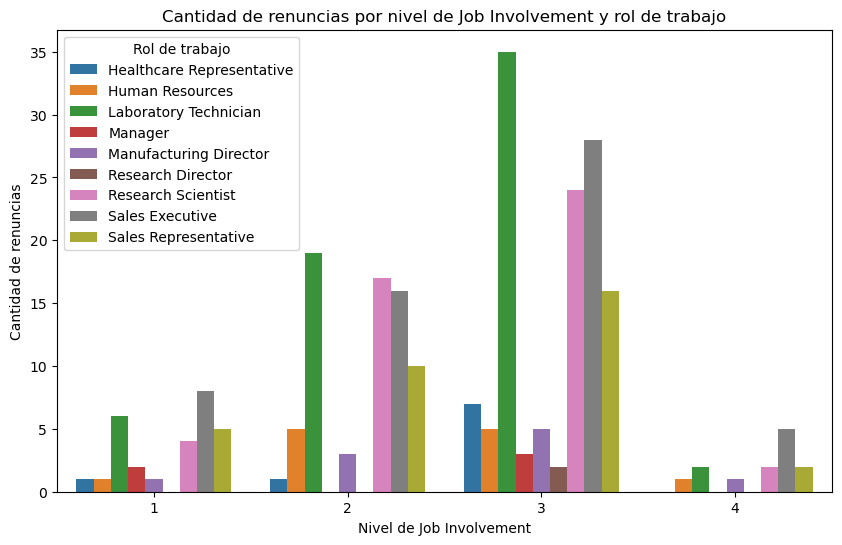

In [510]:
jobi_grouped = df.groupby(['JobInvolvement', 'JobRole']).sum().reset_index()

# Aumentar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Graficar el resultado usando seaborn
sns.barplot(data=jobi_grouped, x='JobInvolvement', y='Attrition', hue='JobRole')

plt.title('Cantidad de renuncias por nivel de Job Involvement y rol de trabajo')
plt.ylabel('Cantidad de renuncias')
plt.xlabel('Nivel de Job Involvement')
plt.legend(title='Rol de trabajo')

# Mostrar el gráfico
plt.show()


***Comentarios:***
+ Es llamativo que un nivel involucramiento "Alto" es el que mayor probabilidades de hacer que una persona renuncie. 

**En conclusión:**
+ Las personas con un nivel de involucramiento "Alto" (3) tiene un 53% de probabilidades de renunciar.

+ Seguidos por las personas con un nivel "Medio" (2), con un 30% de probabilidades.

+ Estos dos niveles del medio, corresponden al 83% de las renuncias. 



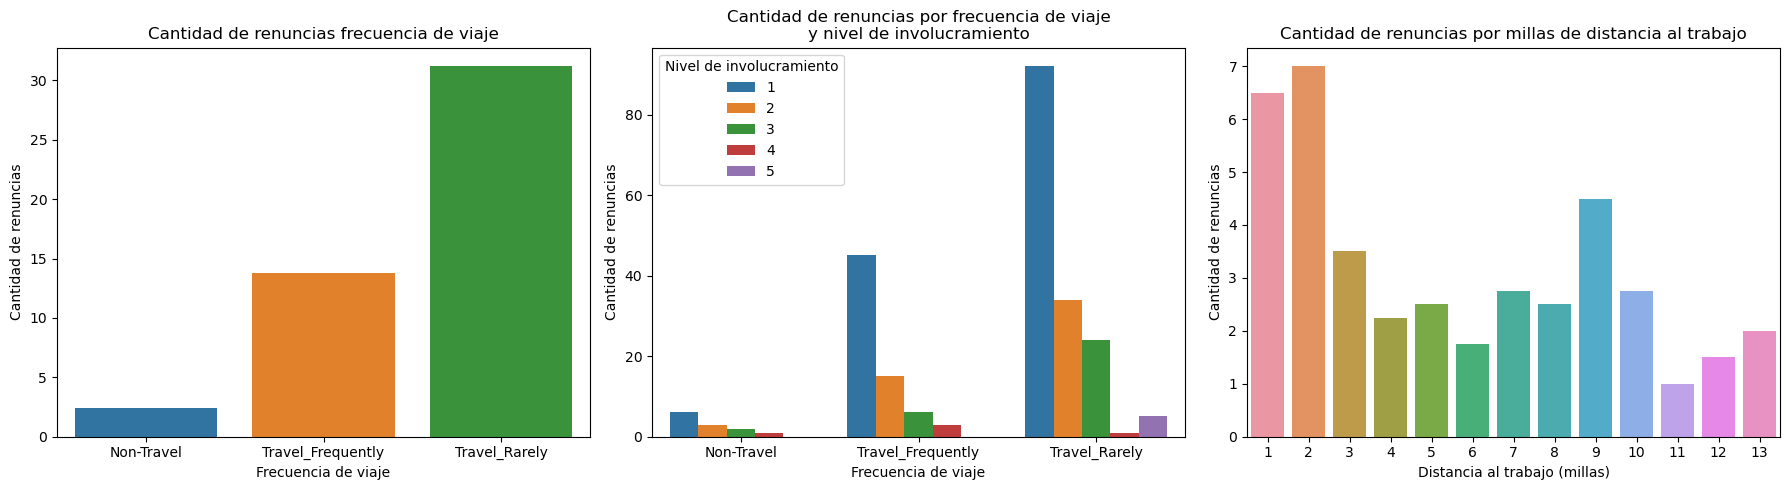

In [511]:
b_travel = df.groupby(['BusinessTravel', 'JobLevel']).sum().reset_index()

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18, 5))

ax1 = sns.barplot(data=b_travel, x='BusinessTravel', y='Attrition', ci=False, ax=ax1)
ax1.set_title('Cantidad de renuncias frecuencia de viaje')
ax1.set_ylabel('Cantidad de renuncias')
ax1.set_xlabel('Frecuencia de viaje')

ax2 = sns.barplot(data=b_travel, x='BusinessTravel', y='Attrition', hue='JobLevel', ax=ax2)
ax2.set_title('Cantidad de renuncias por frecuencia de viaje\ny nivel de involucramiento')
ax2.set_ylabel('Cantidad de renuncias')
ax2.set_xlabel('Frecuencia de viaje')
ax2.legend(title='Nivel de involucramiento')

distance_home = df.groupby(['DistanceFromHome', 'JobSatisfaction']).sum().reset_index()[:50]

# Crear un diccionario para el reemplazo de valores
satisfaction_mapping = {1: "No", 2: "No", 3: "Yes", 4: "Yes"}

# Utilizar la función replace para convertir los valores de JobSatisfaction
distance_home['Satisfaction_Categorized'] = distance_home['JobSatisfaction'].replace(satisfaction_mapping)

ax3 = sns.barplot(data=distance_home, x='DistanceFromHome', y='Attrition',ci=False, ax=ax3)
ax3.set_title('Cantidad de renuncias por millas de distancia al trabajo')
ax3.set_ylabel('Cantidad de renuncias')
ax3.set_xlabel('Distancia al trabajo (millas)')

plt.tight_layout() 

plt.show()


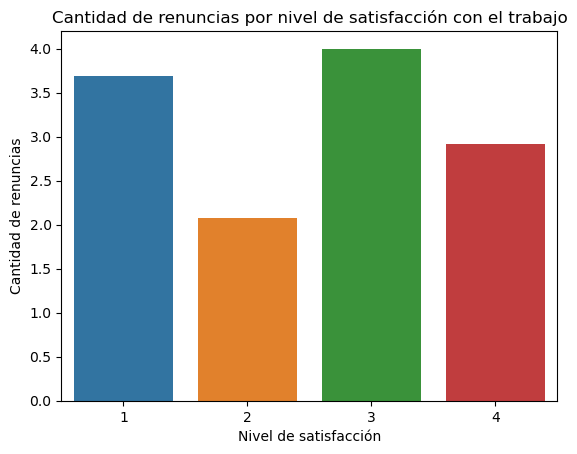

In [512]:
sns.barplot(x=distance_home.JobSatisfaction, y=distance_home.Attrition, ci=False)
plt.title('Cantidad de renuncias por nivel de satisfacción con el trabajo')
plt.ylabel('Cantidad de renuncias')
plt.xlabel('Nivel de satisfacción')
plt.show()

***Comentarios:***

**1.** Pareciera que hay mayor nivel en aquellos que viajan rara vez que aquellos que no viajan en absoluto. ¿Pueda deberse a que estas personas tal vez conocen nuevos sitios y oportunidades? A su vez las personas que viajan frecuentemente a pesar de no tener la misma cantidad de probabilidad de renuncia, tiene una probabilidad mayor que quienes no viajan.

**2.** También pueda deberse a que las personas que viajan raramente hayan visto que esto afecta a sus familias y a sus deseos y buscan un puesto donde no tengan que viajar en absoluto. 

**3.** Vemos que las personas con un bajo nivel de involucramiento en el trabajo tienen muchas más posibilidades de renunciar, por encima del resto. Esto puede ser obvio yaw que se atribuye JobInvolvement al sentimiento de compromiso con la empresa y el lugar de trabajo.

**4.** Hay una tendencia entre las personas que renunciaron y es que su gran mayoría, son personas con una relativa pequeña distancia al trabajo. 

**5.** El nivel de satisfacción con el trabajo, al contrario de lo que uno podría pensar, no tiene una estricta relación con las renuncias. De hecho vemos que la el mayor número de renuncias vienen de personas con un nivel alto. Seguido por el nivel más bajo de satisfacción.  


Text(0.5, 1.0, 'Cantidad de renuncias por nivel de satisfacción\n con las relaciones laborales')

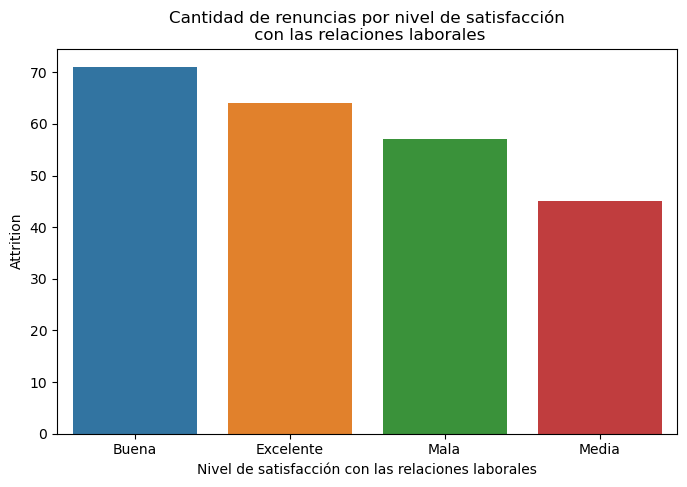

In [513]:
balance_group = df.groupby(['RelationshipSatisfaction']).sum().sort_values('Attrition', ascending=False).reset_index()

balance_group['RelationshipSatisfaction'] = balance_group['RelationshipSatisfaction'].replace({1: 'Mala', 2: 'Media', 3: 'Buena', 4: 'Excelente'})

plt.figure(figsize=(8, 5))

sns.barplot(data=balance_group, x='RelationshipSatisfaction', y='Attrition', ci=False)
plt.xlabel('Nivel de satisfacción con las relaciones laborales')
plt.title('Cantidad de renuncias por nivel de satisfacción\n con las relaciones laborales')

***Comentarios:***

+ El 30% de los colaboradores que renunciaron tiene un nivel de satisfacción con las relaciones laborales "Buena".
+ El 27% de los colaboradores que renunciaron tiene un nivel de satisfacción con las relaciones laborales "Excelente". 

**Conclusión:**
+ Puede deberse a que las personas que elaboran generan buenas relaciones entre sus pares tienen mayor posibilidad de conseguir nuevos puestos y nuevos trabajos.

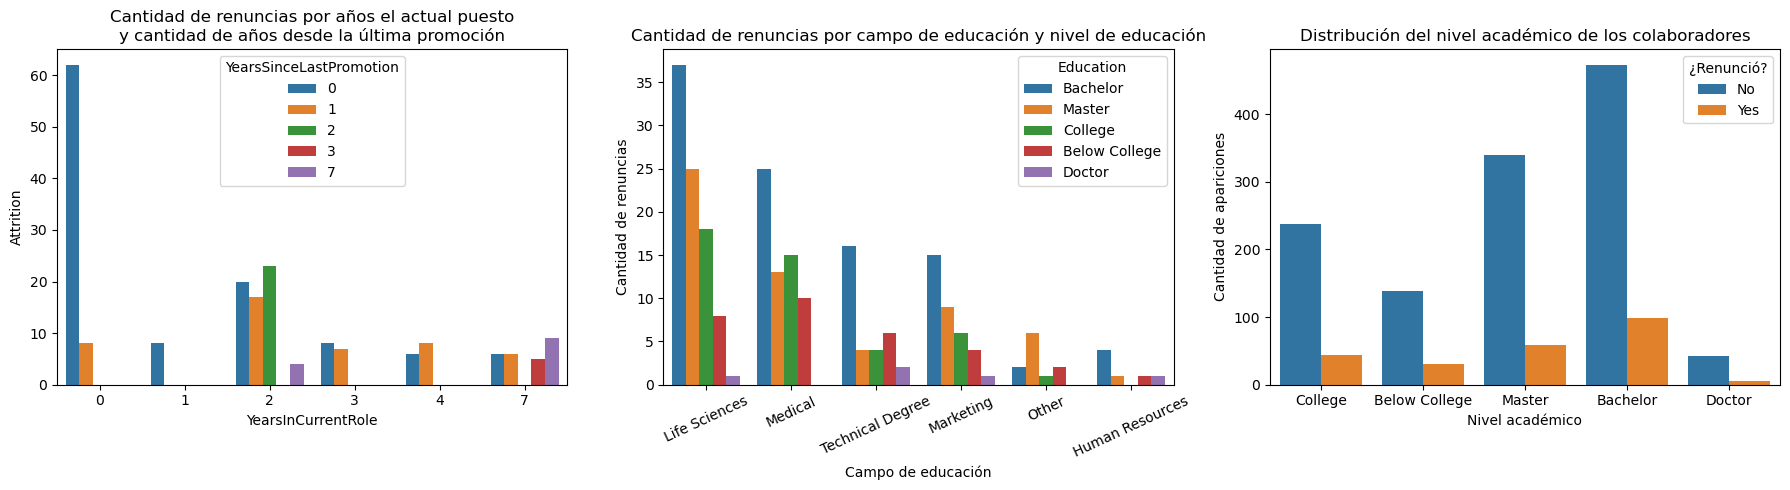

In [514]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

yrs_since_grouped = df.groupby(['YearsInCurrentRole', 'YearsSinceLastPromotion']).sum().sort_values('Attrition', ascending=False).reset_index()[:15]

#Primer gráfico
ax1= sns.barplot(data=yrs_since_grouped, x='YearsInCurrentRole', y='Attrition', hue='YearsSinceLastPromotion', ax=ax1)

ax1.set_title('Cantidad de renuncias por años el actual puesto\ny cantidad de años desde la última promoción')

#Segundo gráfico
education_group = df.groupby(['Education', 'EducationField']).sum().sort_values('Attrition', ascending=False).reset_index()

education_group['Education'] = education_group['Education'].replace({1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'})

sns.barplot(data=education_group, x='EducationField', y='Attrition', hue='Education', ax=ax2)
ax2.set_title('Cantidad de renuncias por campo de educación y nivel de educación')
ax2.set_xlabel('Campo de educación')
ax2.set_ylabel('Cantidad de renuncias')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=25)

#Tercer gráfico
df2['Education_Full'] = df['Education'].replace({1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'})

colores_unicos = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

sns.countplot(x='Education_Full', data=df2, hue='Attrition', palette=colores_unicos, ax=ax3)
ax3.set_title('Distribución del nivel académico de los colaboradores')
ax3.set_xlabel('Nivel académico')
ax3.set_ylabel('Cantidad de apariciones')
ax3.legend(title='¿Renunció?', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


***Comentarios:***

+ El 26% de las personas que renuncian tiene menos de 1 año en su actual puesto y además menos de un año desde su última promoción (o no recibierón ningún ascenso)

+ El 41% de las personas que renunciaron tenían un nivel académico de Bachelor. 

+ Seguido por las personas con Masters que representan un 24% del total.

+ El 37% de las personas que renunciaron pertenecía al campo de educación "Ciencias Sociales" o "Life Sciences".

+ Seguido por el campo Médico, con un 26% del total.

**En conclusión:**

+ Las personas con nivel bachelor perteneciente al campo de "Life Sciences" corresponden al 16% del total de personas que renunciaron. Le sigue, Bachelors en Medicina con el 10%. También con un 10% del total, tenemos al grupo Masters en "Life Sciences".

+ Hay que tener en cuenta también que las personas con nivel Bachelor son el 39% de la base de colaboradores, mientras que los Master el 27%. Con esto podemos determinar que esta organización se basa en talento especializado y con alto nivel académico ya que son los niveles predominantes. Por ello también es normal que predominen sus renuncias.

<AxesSubplot:xlabel='Age', ylabel='Attrition'>

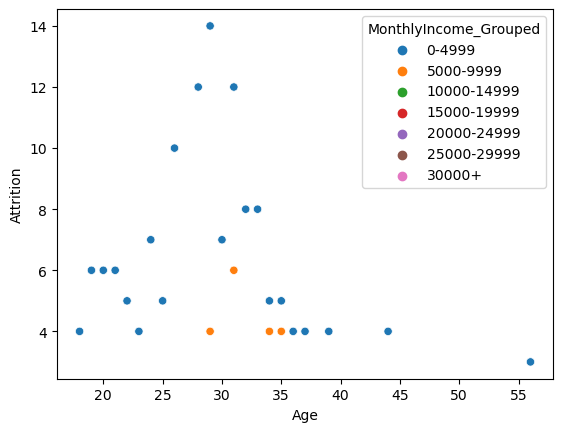

In [515]:
limits = [0, 5000, 10000, 15000, 20000, 25000, 30000, float('inf')]

labels = ['0-4999', '5000-9999', '10000-14999', '15000-19999', '20000-24999', '25000-29999', '30000+']

# Utiliza pd.cut() para crear la variable categórica 'MonthlyIncome_Grouped'.
df2['MonthlyIncome_Grouped'] = pd.cut(df['MonthlyIncome'], bins=limits, labels=labels)

age_grouped = df2.groupby(['Age', 'MonthlyIncome_Grouped']).sum().sort_values('Attrition', ascending=False).reset_index()[:26]

sns.scatterplot(data=age_grouped,x='Age', y='Attrition', hue= 'MonthlyIncome_Grouped')

***Comentarios:***
+ Las edades de entre los 25 y 35 años registran mayor cantidad de renuncias, lo que puede significar que este rango de edad es una época de la vida de las personas en las que pueden experimentar cambios de trabajos por mejores oportunidades y opciones que se les presenten. 

+ No creo que esta variable sea relevante para el modelado de los algoritmos de aprendizaje automatizado. Pero será puesta a prueba.

## Teniendo en cuenta todo lo que vimos vamos a comenzar con el modelado de los datos para procesamiento con machine learning

*Modelos a utilizar:*

+ Regresión Logística: Es un modelo de clasificación binaria básico y ampliamente utilizado. Funciona bien cuando la relación entre las características y la variable objetivo es lineal. Es un buen punto de partida para problemas de clasificación binaria.

+ Support Vector Machine (SVM): SVM es un modelo poderoso para clasificación binaria. Puede manejar tanto problemas lineales como no lineales y tiene la capacidad de encontrar un hiperplano que mejor separe las dos clases. Es especialmente útil cuando el problema es complejo y no lineal.

+ Random Forest: Es un modelo de ensamble que combina múltiples árboles de decisión para obtener una mejor precisión y reducir el sobreajuste. Es robusto y puede manejar bien características no lineales y relaciones complejas.

+ Gradient Boosting: Al igual que Random Forest, es un modelo de ensamble, pero en lugar de combinar árboles en paralelo, los combina en secuencia, centrándose en los errores del modelo anterior. Gradient Boosting tiende a proporcionar un rendimiento aún mejor que Random Forest en muchos casos.

+ Naive Bayes: Es un modelo probabilístico simple y rápido que funciona bien en conjuntos de datos pequeños. Si bien sus supuestos pueden no ser siempre ciertos, es una opción a considerar si tienes pocos datos.

In [516]:
df_train = df.copy()
df_train.head() #Preparamos el dataset de entrenamiento

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [517]:
scaler = StandardScaler() #Procesamiento de variables continuas / discretas 

income_columns = df_train['MonthlyIncome'].values.reshape(-1, 1)

df_train['MonthlyIncome'] = scaler.fit_transform(income_columns)

salary_hike = df_train['PercentSalaryHike'].values.reshape(-1, 1)

df_train['PercentSalaryHike'] = scaler.fit_transform(salary_hike)


In [518]:
df_train = pd.get_dummies(df_train, columns=['OverTime']) # procesamiento de variables categóricas
df_train = pd.get_dummies(df_train, columns=['Gender']) 

In [519]:

df_train['BusinessTravel'] = le.fit_transform(df_train['BusinessTravel'])
df_train['Department'] = le.fit_transform(df_train['Department'])
df_train['JobRole'] = le.fit_transform(df_train['JobRole'])
df_train['MaritalStatus'] = le.fit_transform(df_train['MaritalStatus'])
df_train['JobLevel'] = le.fit_transform(df_train['JobLevel'])
df_train['EducationField'] = le.fit_transform(df_train['EducationField'])


In [520]:
features=['Age',
          'Gender_Female',
          'Gender_Male',
          'BusinessTravel', 
          'Department', 
          'Education',
          'EducationField',
          'JobInvolvement', 
          'JobRole', 
          'JobLevel',
          'MaritalStatus', 
          'MonthlyIncome',
          'PercentSalaryHike', 
          'YearsAtCompany', 
          'OverTime_No', 
          'OverTime_Yes'
]

X= df_train[features] 
y= df_train['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123) # Selección de variables para el entrenamiento y división del dataframe en entrenamiento y test


Como nuestra variable objetivo (Predecir "Atrición: Sí" representa un 16% de todas las instancias, vamos a utilizar un método re muestreo)

In [521]:
ro =  RandomOverSampler(sampling_strategy=0.2, random_state=123) #Aumentamos el número de instancias positivas de 237 a 246 (3.80% de aumento)

X_train_res, y_train_res = ro.fit_resample(X, y)

print ("Distribution before resampling {}".format(Counter(y)))

print ("Distribution labels after resampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({0: 1233, 1: 237})
Distribution labels after resampling Counter({0: 1233, 1: 246})


In [522]:
def run_model(X_train_res, X_test, y_train_res, y_test): #Función para automatizar el entrenamiento del modelo
    lr = LogisticRegression(penalty='l1', class_weight={0:1, 1: 5.8}, C=0.01,solver='liblinear', random_state=123)
    lr =  lr.fit(X_train_res, y_train_res)
    return lr

def mostrar_resultados(y_test, pred_y): #función para visualizar la matriz de confusión
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

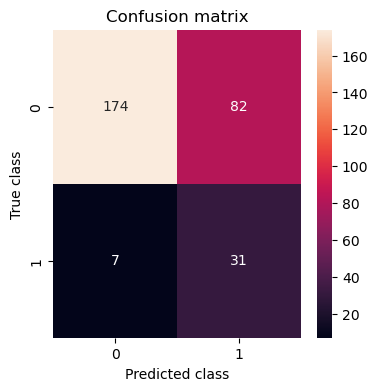

              precision    recall  f1-score   support

           0       0.96      0.68      0.80       256
           1       0.27      0.82      0.41        38

    accuracy                           0.70       294
   macro avg       0.62      0.75      0.60       294
weighted avg       0.87      0.70      0.75       294



In [523]:
model = run_model(X_train_res, X_test, y_train_res, y_test) #aplicamos la función 
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

El modelo predijo exitosamente 31 atriciones de 38 en total. Lo cual es un 82%. Sigue siendo bajo para lo que necesitamos así que continuaremos explorando opciones.

In [524]:
lr_y_pred = model.predict(X_test)

# Exactitud (accuracy)
accuracy = accuracy_score(y_test, lr_y_pred)

# Precisión
precision = precision_score(y_test, lr_y_pred)

# Sensibilidad (recall)
recall = recall_score(y_test, lr_y_pred)

# Especificidad
tn, fp, fn, tp = confusion_matrix(y_test, lr_y_pred).ravel()
specificity = tn / (tn + fp)

Training_Score = model.score(X_train_res, y_train_res)
Test_Score = model.score(X_test, y_test)

# F1 Score
f1 = f1_score(y_test, lr_y_pred)

# Crear un dataframe con los resultados
metricas2_df = pd.DataFrame({'Modelo': ["Logistic Regression"] ,'Accuracy': [round(accuracy*100,2)], 'Precision': [round(precision*100,2)], 'Recall': [round(recall*100,2)], 'Specificity': [round(specificity*100,2)], 'F1 Score': [round(f1*100,2)], 'Training Score': [round(Training_Score*100,2)], 'Test Score': [round(Test_Score*100,2)]})


metricas2_df

,Modelo,Accuracy,Precision,Recall,Specificity,F1 Score,Training Score,Test Score
0,Logistic Regression,69.73,27.43,81.58,67.97,41.06,64.16,69.73


In [525]:
# Restablecer los índices de X_train_res y y_train_res
X_train_res.reset_index(drop=True, inplace=True)
y_train_res.reset_index(drop=True, inplace=True)

# Creamos el modelo de regresión logística
lr = LogisticRegression(penalty='l1', class_weight={0: 1, 1: 5.8}, C=0.01, solver='liblinear', random_state=123)

# Definimos el número de pliegues (K) para la validación cruzada
k_folds = 100

# Inicializamos los listados para almacenar las métricas de rendimiento
accuracy_scores = []
precision_scores = []
recall_scores = []
specificity_scores = []
f1_scores = []

# Creamos el objeto StratifiedKFold para realizar la validación cruzada
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=123)

# Iteramos sobre los pliegues generados por StratifiedKFold
for train_index, test_index in skf.split(X_train_res, y_train_res):
    # Dividimos los datos en conjuntos de entrenamiento y prueba para este pliegue
    X_train_fold, X_test_fold = X_train_res.iloc[train_index], X_train_res.iloc[test_index]
    y_train_fold, y_test_fold = y_train_res.iloc[train_index], y_train_res.iloc[test_index]

    # Entrenamos el modelo en el conjunto de entrenamiento para este pliegue
    lr.fit(X_train_fold, y_train_fold)

    # Realizamos predicciones en el conjunto de prueba para este pliegue
    y_pred = lr.predict(X_test_fold)

    # Calculamos las métricas de rendimiento para este pliegue y las almacenamos en las listas
    accuracy_scores.append(accuracy_score(y_test_fold, y_pred))
    precision_scores.append(precision_score(y_test_fold, y_pred))
    recall_scores.append(recall_score(y_test_fold, y_pred))
    f1_scores.append(f1_score(y_test_fold, y_pred))

    # Calculamos la matriz de confusión para obtener la especificidad
    tn, fp, fn, tp = confusion_matrix(y_test_fold, y_pred).ravel()
    specificity_scores.append(tn / (tn + fp))

# Verificamos que todas las listas tengan la misma longitud
lengths = [len(accuracy_scores), len(precision_scores), len(recall_scores), len(specificity_scores), len(f1_scores)]
if len(set(lengths)) != 1:
    raise ValueError("Las listas de métricas de rendimiento tienen diferentes longitudes.")

# Calculamos el promedio de las métricas de rendimiento para todos los pliegues
average_accuracy = np.mean(accuracy_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_specificity = np.mean(specificity_scores)
average_f1 = np.mean(f1_scores)

Training_Score = lr.score(X_train_fold, y_train_fold)
Test_Score = lr.score(X_test_fold, y_test_fold)

# Crear un dataframe con los resultados
nuevas_metricas = pd.DataFrame({'Modelo': ["Logistic Regression S. K. Fold"],
                             'Accuracy': [round(average_accuracy * 100, 2)],
                             'Precision': [round(average_precision * 100, 2)],
                             'Recall': [round(average_recall * 100, 2)],
                             'Specificity': [round(average_specificity * 100, 2)],
                             'F1 Score': [round(average_f1 * 100, 2)],
                             'Training Score': [round(Training_Score*100,2)],
                             'Test Score' : [round(Test_Score*100,2)]
                             })

# Mostrar el DataFrame con las métricas de rendimiento promedio
metricas2_df = metricas2_df.append(nuevas_metricas)
metricas2_df

,Modelo,Accuracy,Precision,Recall,Specificity,F1 Score,Training Score,Test Score
0,Logistic Regression,69.73,27.43,81.58,67.97,41.06,64.16,69.73
0,Logistic Regression S. K. Fold,63.74,28.83,73.00,62.02,40.12,63.89,71.43


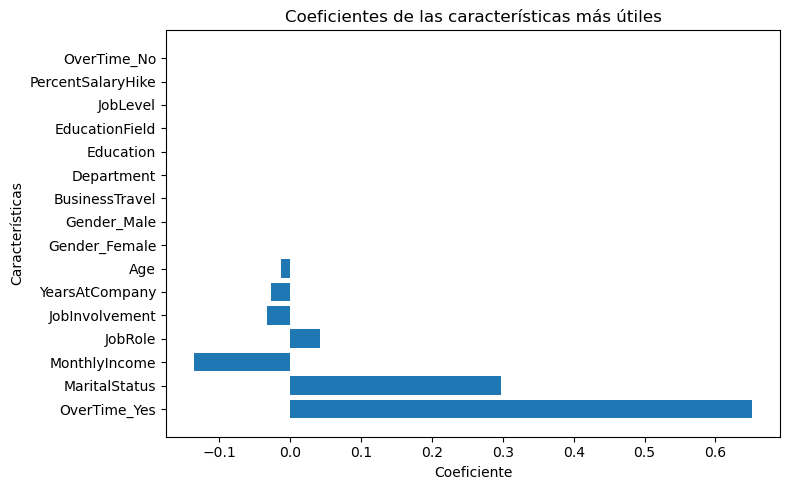

In [526]:
# Obtenemos los coeficientes del modelo
coefficients = lr.coef_

feature_names = features

# Creamos un diccionario para asociar cada característica con su coeficiente
coefficients_dict = {feature: coef for feature, coef in zip(feature_names, coefficients[0])}

# Ordenamos las características por su valor absoluto de coeficiente en orden descendente
most_useful_features = sorted(coefficients_dict.items(), key=lambda x: abs(x[1]), reverse=True)
# Obtener los nombres de las características más útiles y sus coeficientes
most_useful_features_names = [feature for feature, coef in most_useful_features]
most_useful_features_coefs = [coef for feature, coef in most_useful_features]

# Crear la gráfica de barras
plt.figure(figsize=(8, 5))
plt.barh(most_useful_features_names, most_useful_features_coefs)

# Etiquetas y título
plt.xlabel('Coeficiente')
plt.ylabel('Características')
plt.title('Coeficientes de las características más útiles')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


Analizamos las variables más importantes para los modelos de regresión.

In [527]:
# Crear el modelo SVM con un kernel lineal
svm_model = SVC(C=10, kernel='rbf',class_weight='balanced', probability=True,  random_state=123)

# Entrenar el modelo con los datos de entrenamiento
svm_model.fit(X_train_res, y_train_res)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Exactitud (accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Precisión
precision = precision_score(y_test, y_pred)

# Sensibilidad (recall)
recall = recall_score(y_test, y_pred)

# Especificidad
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

Training_Score = svm_model.score(X_train_res, y_train_res)
Test_Score = svm_model.score(X_test, y_test)

# F1 Score
f1 = f1_score(y_test, y_pred)

# Crear un dataframe con los resultados
nuevas_metricas = pd.DataFrame({'Modelo': ["SVC"] ,'Accuracy': [round(accuracy*100,2)], 'Precision': [round(precision*100,2)], 'Recall': [round(recall*100,2)], 'Specificity': [round(specificity*100,2)], 'F1 Score': [round(f1*100,2)], 'Training Score': [round(Training_Score*100,2)], 'Test Score': [round(Test_Score*100,2)]})


metricas2_df = metricas2_df.append(nuevas_metricas)
metricas2_df

,Modelo,Accuracy,Precision,Recall,Specificity,F1 Score,Training Score,Test Score
0,Logistic Regression,69.73,27.43,81.58,67.97,41.06,64.16,69.73
0,Logistic Regression S. K. Fold,63.74,28.83,73.00,62.02,40.12,63.89,71.43
0,SVC,79.93,37.04,78.95,80.08,50.42,76.47,79.93


In [528]:
# Creamos el modelo SVM con los mejores hiperparámetros encontrados
best_svc = SVC(C=100, class_weight='balanced', kernel='rbf', gamma=0.0001, probability= True, random_state=123)

# Realizamos la validación cruzada y obtenemos las predicciones
y_pred_cv = cross_val_predict(best_svc, X_train_res, y_train_res, cv=20)

# Calculamos las métricas de rendimiento en la validación cruzada
accuracy_cv = accuracy_score(y_train_res, y_pred_cv)
precision_cv = precision_score(y_train_res, y_pred_cv)
recall_cv = recall_score(y_train_res, y_pred_cv)
f1_cv = f1_score(y_train_res, y_pred_cv)

# Calculamos la matriz de confusión en la validación cruzada
conf_matrix_cv = confusion_matrix(y_train_res, y_pred_cv)

# Calculamos la especificidad en la validación cruzada
tn, fp, fn, tp = conf_matrix_cv.ravel()
specificity_cv = tn / (tn + fp)

# Calculamos el rendimiento en los datos de entrenamiento y prueba
best_svc.fit(X_train_res, y_train_res)
Training_Score = best_svc.score(X_train_res, y_train_res)
Test_Score = best_svc.score(X_test, y_test)

# Crear un dataframe con los resultados
nuevas_metricas = pd.DataFrame({
    'Modelo': ["Cross Validation SVC"],
    'Accuracy': [round(accuracy_cv * 100, 2)],
    'Precision': [round(precision_cv * 100, 2)],
    'Recall': [round(recall_cv * 100, 2)],
    'Specificity': [round(specificity_cv * 100, 2)],
    'F1 Score': [round(f1_cv * 100, 2)],
    'Training Score': [round(Training_Score * 100, 2)],
    'Test Score': [round(Test_Score * 100, 2)]
})

# Mostrar el DataFrame con las métricas de rendimiento promedio

metricas2_df = metricas2_df.append(nuevas_metricas)
metricas2_df


,Modelo,Accuracy,Precision,Recall,Specificity,F1 Score,Training Score,Test Score
0,Logistic Regression,69.73,27.43,81.58,67.97,41.06,64.16,69.73
0,Logistic Regression S. K. Fold,63.74,28.83,73.00,62.02,40.12,63.89,71.43
0,SVC,79.93,37.04,78.95,80.08,50.42,76.47,79.93
0,Cross Validation SVC,74.37,35.82,68.29,75.59,46.99,75.05,75.85


In [529]:
rf = RandomForestClassifier(ccp_alpha=0.0007, class_weight='balanced' ,random_state=123)

rf.fit(X_train_res, y_train_res)

# Realizar predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

# Exactitud (accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Precisión
precision = precision_score(y_test, y_pred)

# Sensibilidad (recall)
recall = recall_score(y_test, y_pred)

# Especificidad
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

Training_Score = rf.score(X_train_res, y_train_res)
Test_Score = rf.score(X_test, y_test)

# F1 Score
f1 = f1_score(y_test, y_pred)

# Crear un dataframe con los resultados
nuevas_metricas = pd.DataFrame({'Modelo': ["Random Forest Classifier"] ,'Accuracy': [round(accuracy*100,2)], 'Precision': [round(precision*100,2)], 'Recall': [round(recall*100,2)], 'Specificity': [round(specificity*100,2)], 'F1 Score': [round(f1*100,2)], 'Training Score': [round(Training_Score*100,2)], 'Test Score': [round(Test_Score*100,2)]})


metricas2_df = metricas2_df.append(nuevas_metricas)
metricas2_df

,Modelo,Accuracy,Precision,Recall,Specificity,F1 Score,Training Score,Test Score
0,Logistic Regression,69.73,27.43,81.58,67.97,41.06,64.16,69.73
0,Logistic Regression S. K. Fold,63.74,28.83,73.00,62.02,40.12,63.89,71.43
0,SVC,79.93,37.04,78.95,80.08,50.42,76.47,79.93
0,Cross Validation SVC,74.37,35.82,68.29,75.59,46.99,75.05,75.85
0,Random Forest Classifier,100.00,100.00,100.00,100.00,100.00,99.86,100.00


Los modelos de Random Forest Classifier casi siempre tienden al overfiting, aplicamos ccp_alpha= 0.0007 para que no haga sobreajuste.

In [530]:
rfc = RandomForestClassifier(ccp_alpha=0.0007, criterion='entropy', max_depth=None, min_samples_leaf=100, class_weight='balanced' , random_state=123, warm_start=True)

# Realizamos la validación cruzada y obtenemos las predicciones
cv_scores_accuracy = cross_val_score(rfc, X_train_res, y_train_res, cv=25, scoring='accuracy')
cv_scores_precision = cross_val_score(rfc, X_train_res, y_train_res, cv=25, scoring='precision')
cv_scores_recall = cross_val_score(rfc, X_train_res, y_train_res, cv=25, scoring='recall')
cv_scores_f1 = cross_val_score(rfc, X_train_res, y_train_res, cv=25, scoring='f1')

# Calculamos las métricas de rendimiento promedio en la validación cruzada
average_accuracy = np.mean(cv_scores_accuracy)
average_precision = np.mean(cv_scores_precision)
average_recall = np.mean(cv_scores_recall)
average_f1 = np.mean(cv_scores_f1)

# Ajustamos el modelo en el conjunto de entrenamiento completo
rfc.fit(X_train_res, y_train_res)

# Calculamos el rendimiento en los datos de entrenamiento y prueba
Training_Score = rfc.score(X_train_res, y_train_res)
Test_Score = rfc.score(X_test, y_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# Crear un dataframe con los resultados
nuevas_metricas = pd.DataFrame({
    'Modelo': ["Cross Validate Random Forest Classifier"],
    'Accuracy': [round(average_accuracy * 100, 2)],
    'Precision': [round(average_precision * 100, 2)],
    'Recall': [round(average_recall * 100, 2)],
    'Specificity': [round(specificity*100,2)],  # Aquí puedes agregar la especificidad si lo deseas
    'F1 Score': [round(average_f1 * 100, 2)],
    'Training Score': [round(Training_Score * 100, 2)],
    'Test Score': [round(Test_Score * 100, 2)]
})

# Agregar las métricas promedio al DataFrame existente
metricas2_df = metricas2_df.append(nuevas_metricas, ignore_index=True)

# Mostrar el DataFrame con las métricas de rendimiento promedio
metricas2_df


,Modelo,Accuracy,Precision,Recall,Specificity,F1 Score,Training Score,Test Score
0,Logistic Regression,69.73,27.43,81.58,67.97,41.06,64.16,69.73
1,Logistic Regression S. K. Fold,63.74,28.83,73.00,62.02,40.12,63.89,71.43
2,SVC,79.93,37.04,78.95,80.08,50.42,76.47,79.93
3,Cross Validation SVC,74.37,35.82,68.29,75.59,46.99,75.05,75.85
4,Random Forest Classifier,100.00,100.00,100.00,100.00,100.00,99.86,100.00
5,Cross Validate Random Forest Classifier,68.97,31.58,70.00,100.00,43.17,69.84,73.47


In [531]:
dtc = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.00001 , class_weight='balanced', min_samples_leaf=12, max_leaf_nodes=50, random_state=123)
dtc.fit(X_train_res, y_train_res)
dtc_pred = dtc.predict(X_test)

# Exactitud (accuracy) 
accuracy = accuracy_score(y_test, dtc_pred)

# Precisión
precision = precision_score(y_test, dtc_pred)

# Sensibilidad (recall)
recall = recall_score(y_test, dtc_pred)

# Especificidad
tn, fp, fn, tp = confusion_matrix(y_test, dtc_pred).ravel()
specificity = tn / (tn + fp)

Training_Score = dtc.score(X_train_res, y_train_res)
Test_Score = dtc.score(X_test, y_test)

# F1 Score
f1 = f1_score(y_test, dtc_pred)

nuevas_metricas = pd.DataFrame({'Modelo': ["Decision Tree Classifier"] ,
                                'Accuracy': [round(accuracy*100,2)], 
                                'Precision': [round(precision*100,2)], 
                                'Recall': [round(recall*100,2)], 
                                'Specificity': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)],
                                'Training Score': [round(Training_Score * 100, 2)],
                                'Test Score': [round(Test_Score * 100, 2)]})

metricas2_df = metricas2_df.append(nuevas_metricas, ignore_index=True)

metricas2_df

,Modelo,Accuracy,Precision,Recall,Specificity,F1 Score,Training Score,Test Score
0,Logistic Regression,69.73,27.43,81.58,67.97,41.06,64.16,69.73
1,Logistic Regression S. K. Fold,63.74,28.83,73.00,62.02,40.12,63.89,71.43
2,SVC,79.93,37.04,78.95,80.08,50.42,76.47,79.93
3,Cross Validation SVC,74.37,35.82,68.29,75.59,46.99,75.05,75.85
4,Random Forest Classifier,100.00,100.00,100.00,100.00,100.00,99.86,100.00
5,Cross Validate Random Forest Classifier,68.97,31.58,70.00,100.00,43.17,69.84,73.47
6,Decision Tree Classifier,78.23,36.73,94.74,75.78,52.94,77.69,78.23


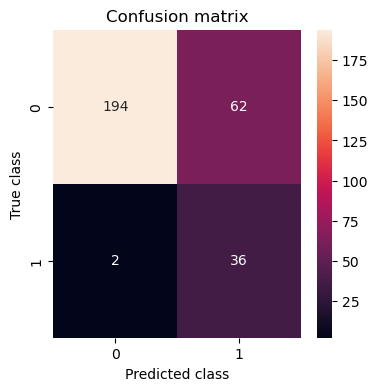

              precision    recall  f1-score   support

           0       0.99      0.76      0.86       256
           1       0.37      0.95      0.53        38

    accuracy                           0.78       294
   macro avg       0.68      0.85      0.69       294
weighted avg       0.91      0.78      0.82       294



In [532]:
conf_matrix = confusion_matrix(y_test, dtc_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
print (classification_report(y_test, dtc_pred))

Probamos con un árbol de decisión, tuvimos un buen recall, casi 95% de aciertos. Seguiremos viendo más opciones. 36 aciertos de 38.

In [533]:
gbc = GradientBoostingClassifier(loss= 'deviance', n_estimators=100, learning_rate=0.5, min_samples_split= 2, min_samples_leaf=2, subsample=0.8, max_features='auto', random_state=123)

gbc.fit(X_train_res, y_train_res)

gbc_pred = gbc.predict(X_test)

# Exactitud (accuracy) 
accuracy = accuracy_score(y_test, gbc_pred)

# Precisión
precision = precision_score(y_test, gbc_pred)

# Sensibilidad (recall)
recall = recall_score(y_test, gbc_pred)

# Especificidad
tn, fp, fn, tp = confusion_matrix(y_test, gbc_pred).ravel()
specificity = tn / (tn + fp)

Training_Score = gbc.score(X_train_res, y_train_res)
Test_Score = gbc.score(X_test, y_test)

# F1 Score
f1 = f1_score(y_test, gbc_pred)

nuevas_metricas = pd.DataFrame({'Modelo': ["Gradient Booster Classifier"] ,
                                'Accuracy': [round(accuracy*100,2)], 
                                'Precision': [round(precision*100,2)], 
                                'Recall': [round(recall*100,2)], 
                                'Specificity': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)],
                                'Training Score': [round(Training_Score * 100, 2)],
                                'Test Score': [round(Test_Score * 100, 2)]})

metricas2_df = metricas2_df.append(nuevas_metricas, ignore_index=True)

metricas2_df


,Modelo,Accuracy,Precision,Recall,Specificity,F1 Score,Training Score,Test Score
0,Logistic Regression,69.73,27.43,81.58,67.97,41.06,64.16,69.73
1,Logistic Regression S. K. Fold,63.74,28.83,73.00,62.02,40.12,63.89,71.43
2,SVC,79.93,37.04,78.95,80.08,50.42,76.47,79.93
3,Cross Validation SVC,74.37,35.82,68.29,75.59,46.99,75.05,75.85
4,Random Forest Classifier,100.00,100.00,100.00,100.00,100.00,99.86,100.00
5,Cross Validate Random Forest Classifier,68.97,31.58,70.00,100.00,43.17,69.84,73.47
6,Decision Tree Classifier,78.23,36.73,94.74,75.78,52.94,77.69,78.23
7,Gradient Booster Classifier,99.66,100.00,97.37,100.00,98.67,98.78,99.66


Gradient Booster Classifier ha sido un buen modelo y sin overfiting, vamos a probar con validación stratificada K para evitar overfitting y aumentar la generalización del modelo

In [534]:
X_train_res.reset_index(drop=True, inplace=True)
y_train_res.reset_index(drop=True, inplace=True)

# Creamos el modelo de regresión logística
gbc = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, min_samples_split= 30, min_samples_leaf=10, subsample=0.8, max_features='sqrt', random_state=123)

# Definimos el número de pliegues (K) para la validación cruzada
k_folds = 100

# Inicializamos los listados para almacenar las métricas de rendimiento
accuracy_scores = []
precision_scores = []
recall_scores = []
specificity_scores = []
f1_scores = []

# Creamos el objeto StratifiedKFold para realizar la validación cruzada
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=123)

# Iteramos sobre los pliegues generados por StratifiedKFold
for train_index, test_index in skf.split(X_train_res, y_train_res):
    # Dividimos los datos en conjuntos de entrenamiento y prueba para este pliegue
    X_train_fold, X_test_fold = X_train_res.iloc[train_index], X_train_res.iloc[test_index]
    y_train_fold, y_test_fold = y_train_res.iloc[train_index], y_train_res.iloc[test_index]

    # Entrenamos el modelo en el conjunto de entrenamiento para este pliegue
    gbc.fit(X_train_fold, y_train_fold)

    # Realizamos predicciones en el conjunto de prueba para este pliegue
    y_pred = gbc.predict(X_test_fold)

    # Calculamos las métricas de rendimiento para este pliegue y las almacenamos en las listas
    accuracy_scores.append(accuracy_score(y_test_fold, y_pred))
    precision_scores.append(precision_score(y_test_fold, y_pred))
    recall_scores.append(recall_score(y_test_fold, y_pred))
    f1_scores.append(f1_score(y_test_fold, y_pred))

    # Calculamos la matriz de confusión para obtener la especificidad
    tn, fp, fn, tp = confusion_matrix(y_test_fold, y_pred).ravel()
    specificity_scores.append(tn / (tn + fp))

# Verificamos que todas las listas tengan la misma longitud
lengths = [len(accuracy_scores), len(precision_scores), len(recall_scores), len(specificity_scores), len(f1_scores)]
if len(set(lengths)) != 1:
    raise ValueError("Las listas de métricas de rendimiento tienen diferentes longitudes.")

# Calculamos el promedio de las métricas de rendimiento para todos los pliegues
average_accuracy = np.mean(accuracy_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_specificity = np.mean(specificity_scores)
average_f1 = np.mean(f1_scores)

Training_Score = gbc.score(X_train_fold, y_train_fold)
Test_Score = gbc.score(X_test_fold, y_test_fold)

# Crear un dataframe con los resultados
nuevas_metricas = pd.DataFrame({'Modelo': ["GBC StratifiedKFold"],
                             'Accuracy': [round(average_accuracy * 100, 2)],
                             'Precision': [round(average_precision * 100, 2)],
                             'Recall': [round(average_recall * 100, 2)],
                             'Specificity': [round(average_specificity * 100, 2)],
                             'F1 Score': [round(average_f1 * 100, 2)],
                             'Training Score': [round(Training_Score*100,2)],
                             'Test Score' : [round(Test_Score*100,2)]
                             })

# Mostrar el DataFrame con las métricas de rendimiento promedio
metricas2_df = metricas2_df.append(nuevas_metricas)
metricas2_df

,Modelo,Accuracy,Precision,Recall,Specificity,F1 Score,Training Score,Test Score
0,Logistic Regression,69.73,27.43,81.58,67.97,41.06,64.16,69.73
1,Logistic Regression S. K. Fold,63.74,28.83,73.00,62.02,40.12,63.89,71.43
2,SVC,79.93,37.04,78.95,80.08,50.42,76.47,79.93
3,Cross Validation SVC,74.37,35.82,68.29,75.59,46.99,75.05,75.85
4,Random Forest Classifier,100.00,100.00,100.00,100.00,100.00,99.86,100.00
5,Cross Validate Random Forest Classifier,68.97,31.58,70.00,100.00,43.17,69.84,73.47
6,Decision Tree Classifier,78.23,36.73,94.74,75.78,52.94,77.69,78.23
7,Gradient Booster Classifier,99.66,100.00,97.37,100.00,98.67,98.78,99.66
0,GBC StratifiedKFold,85.97,54.25,32.83,96.67,39.03,91.40,71.43


La validación estratificada de K hizo que el modelo bajara mucho su rendimiento y vemos la difrencia clara el entrenamiento y el test. Vemos un claro overfitting. Probemos con validación cruzada también.

In [535]:
# Definir el rango de valores para cada hiperparámetro
param_dist = {
    'n_estimators': [150, 100, 200, 300, 500],
    'learning_rate': [0.3, 0.5, 0.2],
    'max_depth': [3, 15, 20, 100],
    'min_samples_split': [30, 15, 12, 10],
    'min_samples_leaf': [3, 2, 7, 12],
    'subsample': [0.8, 0.7, 0.6],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Creamos el modelo Gradient Boosting
gb = GradientBoostingClassifier(loss='deviance', random_state=123)

# Creamos el objeto RandomizedSearchCV con scoring='recall' y cv=5 (5 pliegues para validación cruzada)
random_search = RandomizedSearchCV(
    gb, param_distributions=param_dist, n_iter=50, cv=10, scoring='recall', random_state=123
)

# Realizamos la búsqueda aleatoria con validación cruzada
random_search.fit(X_train_res, y_train_res)

# Obtenemos los mejores hiperparámetros encontrados
best_params = random_search.best_params_

# Creamos el modelo Gradient Boosting con los mejores hiperparámetros
best_gb = GradientBoostingClassifier(loss='deviance', **best_params, random_state=123)

# Entrenamos el modelo con el conjunto de entrenamiento
best_gb.fit(X_train_res, y_train_res)

# Realizamos predicciones en el conjunto de prueba
y_pred = best_gb.predict(X_test)

# Calculamos el recall en el conjunto de prueba
recall = recall_score(y_test, y_pred)

# Mostramos los resultados
print('Best Hyperparameters:', best_params)
print('Recall:', recall)


Best Hyperparameters: {'subsample': 0.7, 'n_estimators': 150, 'min_samples_split': 30, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_depth': 3, 'learning_rate': 0.5}
Recall: 0.9736842105263158


In [536]:
# Exactitud (accuracy) 
accuracy = accuracy_score(y_test, y_pred)

# Precisión
precision = precision_score(y_test, y_pred)

# Sensibilidad (recall)
recall = recall_score(y_test, y_pred)

# Especificidad
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

Training_Score = best_gb.score(X_train_res, y_train_res)
Test_Score = best_gb.score(X_test, y_test)

# F1 Score
f1 = f1_score(y_test, y_pred)

nuevas_metricas = pd.DataFrame({'Modelo': ["Cross Validation GBC "] ,
                                'Accuracy': [round(accuracy*100,2)], 
                                'Precision': [round(precision*100,2)], 
                                'Recall': [round(recall*100,2)], 
                                'Specificity': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)],
                                'Training Score': [round(Training_Score * 100, 2)],
                                'Test Score': [round(Test_Score * 100, 2)]})

metricas2_df = metricas2_df.append(nuevas_metricas, ignore_index=True)

metricas2_df


,Modelo,Accuracy,Precision,Recall,Specificity,F1 Score,Training Score,Test Score
0,Logistic Regression,69.73,27.43,81.58,67.97,41.06,64.16,69.73
1,Logistic Regression S. K. Fold,63.74,28.83,73.00,62.02,40.12,63.89,71.43
2,SVC,79.93,37.04,78.95,80.08,50.42,76.47,79.93
3,Cross Validation SVC,74.37,35.82,68.29,75.59,46.99,75.05,75.85
4,Random Forest Classifier,100.00,100.00,100.00,100.00,100.00,99.86,100.00
5,Cross Validate Random Forest Classifier,68.97,31.58,70.00,100.00,43.17,69.84,73.47
6,Decision Tree Classifier,78.23,36.73,94.74,75.78,52.94,77.69,78.23
7,Gradient Booster Classifier,99.66,100.00,97.37,100.00,98.67,98.78,99.66
8,GBC StratifiedKFold,85.97,54.25,32.83,96.67,39.03,91.40,71.43
9,Cross Validation GBC,99.66,100.00,97.37,100.00,98.67,97.57,99.66


Un modelo con validación cruzada y muy buenos resultados, sin overfitting.

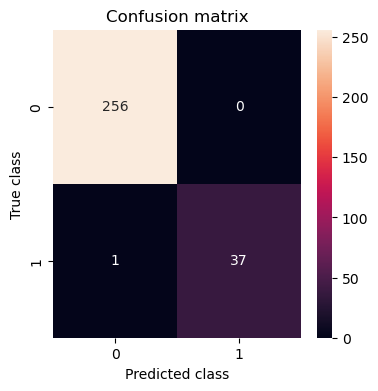

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       256
           1       1.00      0.97      0.99        38

    accuracy                           1.00       294
   macro avg       1.00      0.99      0.99       294
weighted avg       1.00      1.00      1.00       294



In [537]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
print (classification_report(y_test, y_pred))

37 aciertos de 38, es un modelo muy robusto, a su vez, acertó el 100% de los casos negativos.

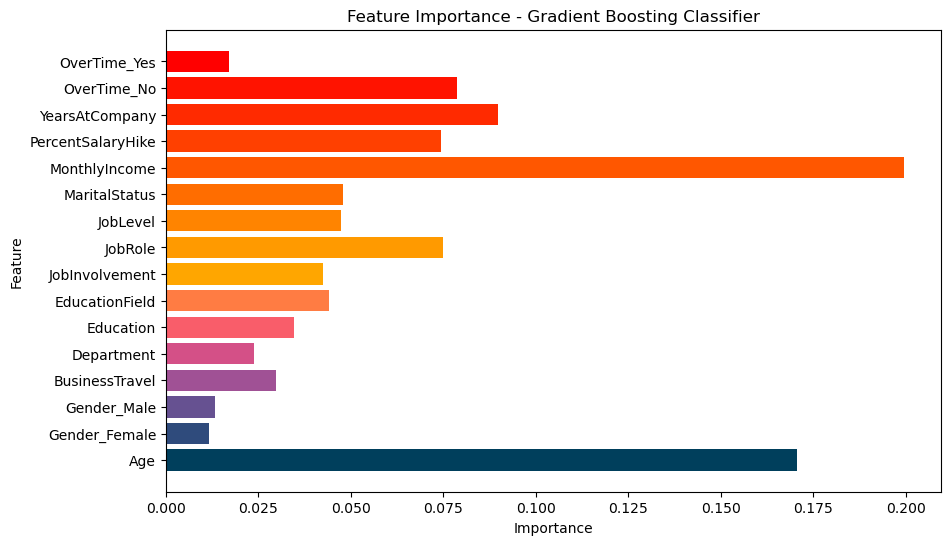

In [538]:
# Obtener la importancia de las características
feature_importance = best_gb.feature_importances_

# Obtener los nombres de las características
feature_names = X_train_res.columns.tolist()

colors = ['#003f5c', '#2f4b7c', '#665191', '#a05195', '#d45087', '#f95d6a', '#ff7c43', '#ffa600',
          '#ff9a00', '#ff8400', '#ff6d00', '#ff5700', '#ff4000', '#ff2a00', '#ff1300', '#ff0000']

# Crear un gráfico de barras para mostrar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color=colors)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Gradient Boosting Classifier')
plt.show()


Con este gráfico podemos tener en cuenta cuales son las variables más importantes para el modelo. 

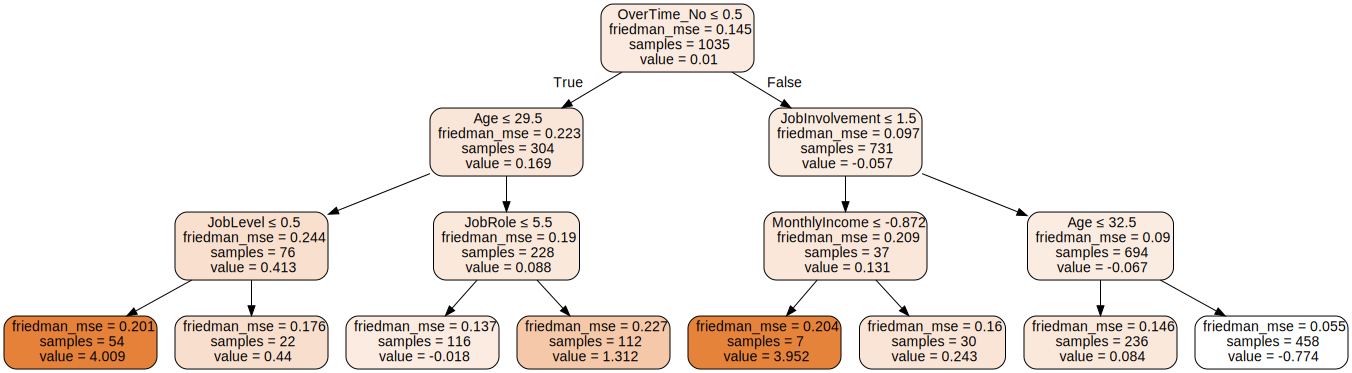

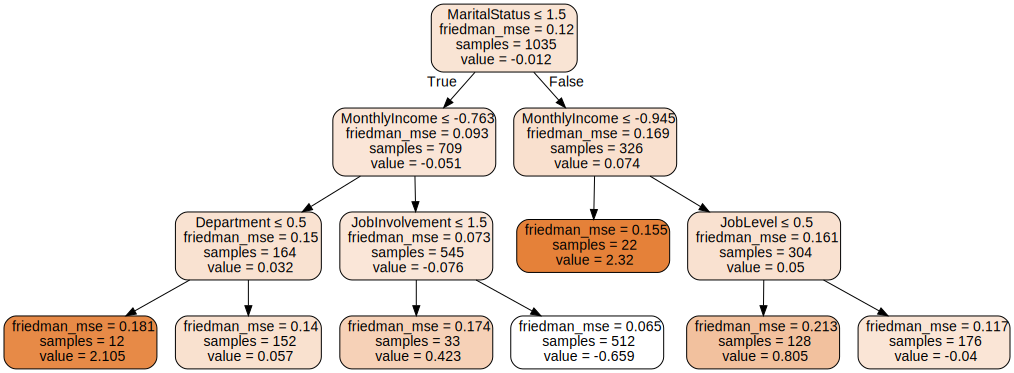

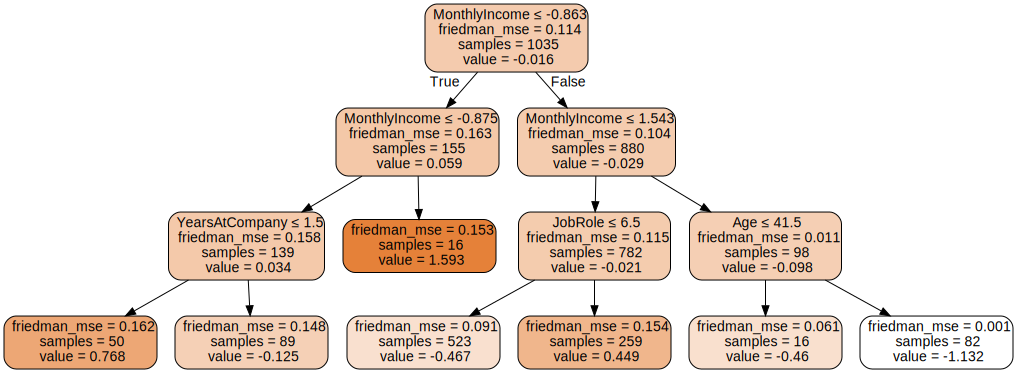

In [539]:
num_trees_to_visualize = 3
selected_trees = best_gb.estimators_[:num_trees_to_visualize]

# Visualizar los árboles seleccionados uno por uno
for i, estimator in enumerate(selected_trees):
    dot_data = export_graphviz(
        estimator[0],
        out_file=None,
        feature_names=X_train_res.columns.tolist(),
        class_names=["0", "1"],  # Nombres de las clases
        filled=True,
        rounded=True,
        special_characters=True,
        max_depth=3,  # Limitar la profundidad máxima del árbol
    )
    graph = graphviz.Source(dot_data, format='png', engine='dot', filename=f"tree_{i}.png")
    display(graph)


Vemos que monthly income, Years at company, Age y Job Role son variables que le ayudan al algoritmo a decidir si el usuario cometerá atrición.

In [540]:
gnb = GaussianNB(priors=[0.8337,0.1663])

gnb.fit(X_train_res, y_train_res)

gnb_pred = gnb.predict(X_test)

# Exactitud (accuracy) 
accuracy = accuracy_score(y_test, gnb_pred)

# Precisión
precision = precision_score(y_test, gnb_pred)

# Sensibilidad (recall)
recall = recall_score(y_test, gnb_pred)

# Especificidad
tn, fp, fn, tp = confusion_matrix(y_test, gnb_pred).ravel()
specificity = tn / (tn + fp)

Training_Score = gnb.score(X_train_res, y_train_res)
Test_Score = gnb.score(X_test, y_test)

# F1 Score
f1 = f1_score(y_test, gnb_pred)

nuevas_metricas = pd.DataFrame({'Modelo': ["Gaussian Naive Bayes"] ,
                                'Accuracy': [round(accuracy*100,2)], 
                                'Precision': [round(precision*100,2)], 
                                'Recall': [round(recall*100,2)], 
                                'Specificity': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)],
                                'Training Score': [round(Training_Score * 100, 2)],
                                'Test Score': [round(Test_Score * 100, 2)]})

metricas2_df = metricas2_df.append(nuevas_metricas, ignore_index=True)

metricas2_df


,Modelo,Accuracy,Precision,Recall,Specificity,F1 Score,Training Score,Test Score
0,Logistic Regression,69.73,27.43,81.58,67.97,41.06,64.16,69.73
1,Logistic Regression S. K. Fold,63.74,28.83,73.00,62.02,40.12,63.89,71.43
2,SVC,79.93,37.04,78.95,80.08,50.42,76.47,79.93
3,Cross Validation SVC,74.37,35.82,68.29,75.59,46.99,75.05,75.85
4,Random Forest Classifier,100.00,100.00,100.00,100.00,100.00,99.86,100.00
5,Cross Validate Random Forest Classifier,68.97,31.58,70.00,100.00,43.17,69.84,73.47
6,Decision Tree Classifier,78.23,36.73,94.74,75.78,52.94,77.69,78.23
7,Gradient Booster Classifier,99.66,100.00,97.37,100.00,98.67,98.78,99.66
8,GBC StratifiedKFold,85.97,54.25,32.83,96.67,39.03,91.40,71.43
9,Cross Validation GBC,99.66,100.00,97.37,100.00,98.67,97.57,99.66


Probamos con más modelos

In [541]:
base_classifiers = [
    RandomForestClassifier(ccp_alpha=0.00007, random_state=42),
    GradientBoostingClassifier(loss= 'deviance',learning_rate=0.01, n_estimators=150, criterion='friedman_mse', max_features='log2', random_state=42),
    DecisionTreeClassifier(ccp_alpha=0.00007, random_state=42)
]

# Combinar las predicciones de los clasificadores base usando cross-validation
X_meta_train = np.zeros((len(y_train_res), len(base_classifiers)))
for idx, clf in enumerate(base_classifiers):
    fold_predictions = cross_val_predict(clf, X_train_res, y_train_res, cv=10, method='predict_proba')
    X_meta_train[:, idx] = fold_predictions[:, 1]  # Usamos la probabilidad de la clase positiva

# Entrenar el meta-clasificador (usaremos un clasificador Random Forest como ejemplo)
meta_classifier =  GradientBoostingClassifier(loss= 'deviance',learning_rate=0.01, n_estimators=150, criterion='friedman_mse', max_features='log2', random_state=42)
meta_classifier.fit(X_meta_train, y_train_res)

# Combinar las predicciones de los clasificadores base en el conjunto de prueba
X_meta_test = np.zeros((len(y_test), len(base_classifiers)))
for idx, clf in enumerate(base_classifiers):
    clf.fit(X_train_res, y_train_res)
    X_meta_test[:, idx] = clf.predict_proba(X_test)[:, 1]  # Usamos la probabilidad de la clase positiva

# Hacer predicciones con el meta-clasificador en el conjunto de prueba
y_pred = meta_classifier.predict(X_meta_test)

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_pred)

training_score = meta_classifier.score(X_meta_train, y_train_res)

test_score = meta_classifier.score(X_meta_test, y_test)

# F1 Score
f1 = f1_score(y_test, gnb_pred)

nuevas_metricas = pd.DataFrame({'Modelo': ["Cross Validated Stacking Ensemble Model"] ,
                                'Accuracy': [round(accuracy*100,2)], 
                                'Precision': [round(precision*100,2)], 
                                'Recall': [round(recall*100,2)], 
                                'Specificity': [round(specificity*100,2)], 
                                'F1 Score': [round(f1*100,2)],
                                'Training Score': [round(training_score * 100, 2)],
                                'Test Score': [round(test_score * 100, 2)]})

metricas2_df = metricas2_df.append(nuevas_metricas, ignore_index=True)

metricas2_df


,Modelo,Accuracy,Precision,Recall,Specificity,F1 Score,Training Score,Test Score
0,Logistic Regression,69.73,27.43,81.58,67.97,41.06,64.16,69.73
1,Logistic Regression S. K. Fold,63.74,28.83,73.00,62.02,40.12,63.89,71.43
2,SVC,79.93,37.04,78.95,80.08,50.42,76.47,79.93
3,Cross Validation SVC,74.37,35.82,68.29,75.59,46.99,75.05,75.85
4,Random Forest Classifier,100.00,100.00,100.00,100.00,100.00,99.86,100.00
5,Cross Validate Random Forest Classifier,68.97,31.58,70.00,100.00,43.17,69.84,73.47
6,Decision Tree Classifier,78.23,36.73,94.74,75.78,52.94,77.69,78.23
7,Gradient Booster Classifier,99.66,100.00,97.37,100.00,98.67,98.78,99.66
8,GBC StratifiedKFold,85.97,54.25,32.83,96.67,39.03,91.40,71.43
9,Cross Validation GBC,99.66,100.00,97.37,100.00,98.67,97.57,99.66


Probamos el modelo de ensamble por stacking con validación cruzada y tiene buenos resultados, incluso con un buen rendimiento en el dataset de validación.

In [542]:
def plot_roc_curves(models, X, y): #Toma los modelos ya fiteados
    fig, ax = plt.subplots(figsize=(5,5))
    for model in models:
        y_score = model.predict_proba(X)[:,1]  
        fpr, tpr, thresholds = roc_curve(y, y_score)
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')
        
    ax.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    ax.set_xlim([-0.01, 1.0])
    ax.set_ylim([0.0, 1.01])
    ax.set_xlabel('Tasa de Falsos Positivos')
    ax.set_ylabel('Tasa de Verdaderos Positivos')
    ax.set_title('Receiver Operating Characteristic')
    ax.legend(loc='lower right')
    plt.show()

In [543]:
models= [lr,best_svc, gnb, dtc, rfc, best_gb]

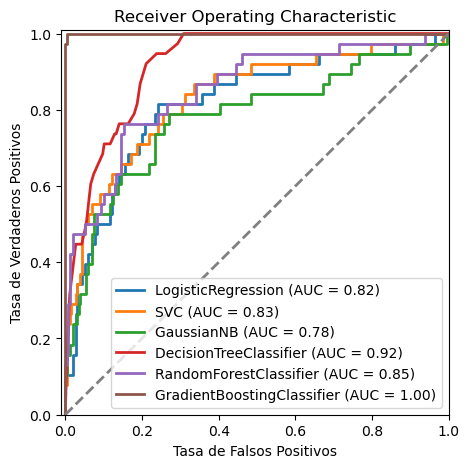

In [544]:
plot_roc_curves(models,X_test,y_test)

Al fin y al cabo, Gradient Boosting Classifier con Validación Cruzada es el modelo con mayor tasa de éxito en la predicción de modelos y con él podremos traer nuevos datos y conocer que posibilidad hay de que las personas cometan atrición.

**Lo que también nos ha quedado claro es que lo que gana una persona mensualmente, sumado a su edad, su estado marital, el tipo de trabajo y la cantidad de años que lleva en la corporación son variables muy importantes para predecir renuncias en esta organización.**